<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/%ED%86%B5%EA%B3%84_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [253]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv',index_col=0)
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  
0                 1.335             1144  
1                 1.541             1291  
2                 2.594             1887  
3                 1.405             1171  
4                 2.175              816

In [254]:
## 1. Îã®ÏùºÌëúÎ≥∏ TÍ≤ÄÏ†ï
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÍ∞Ä ÏûàÏùÑÎïå, 1Í∞úÏùò Î≥ÄÏàòÍ∞Ä Ï£ºÏñ¥ÏßÑ ÌèâÍ∑†Í≥º Í∞ôÏùÄÏßÄ Î¨ºÏñ¥Î≥∏Îã§
# Credit_LimitÏùò ÌèâÍ∑†Ïù¥ 100000Ïù¥Îã§

stat, p_val = stats.ttest_1samp(df['Credit_Limit'] , 10000)
print(p_val)

2.871564454116387e-51


In [255]:
## 2. ÎèÖÎ¶ΩÌëúÎ≥∏ TÍ≤ÄÏ†ï
# ÎÇ®,Ïó¨ / Ï†ïÍ∑ú, ÎπÑÏ†ïÍ∑úÏßÅ Ï≤òÎüº ÎåÄÎ¶ΩÎêòÎäî Îëê ÏßëÎã®Ïùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏûàÎäîÍ∞Ä.

# GenderÎ≥ÑÎ°ú Credit_LimitÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

m = df[df['Gender'] == 'M']['Credit_Limit']
f = df[df['Gender'] == 'F']['Credit_Limit']

# Îì±Î∂ÑÏÇ∞ Í∞ÄÏ†ï
print(stats.bartlett(m, f))


# 2.1 Îì±Î∂ÑÏÇ∞ÏùºÎïå,
stat, p_val = stats.ttest_ind(m, f , equal_var = True)
print(p_val)

# 2.2 Îì±Î∂ÑÏÇ∞Ïù¥ ÏïÑÎãêÎïå,
stat, p_val = stats.ttest_ind(m, f , equal_var = False)

# 2.3 Ï†ïÍ∑úÏÑ± X , Îì±Î∂ÑÏÇ∞ X ÏùºÎïå > ÎßåÏúÑÌä∏Îãà
stats, p_val = stats.mannwhitneyu(m, f , alternative = 'two-sided')

BartlettResult(statistic=np.float64(2393.8040760235226), pvalue=np.float64(0.0))
0.0


In [256]:
from scipy import stats

url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/sleep.csv"
df = pd.read_csv(url)

print(df.head())
## 3. ÎåÄÏùëÌëúÎ≥∏ TÍ≤ÄÏ†ï
# Ïßù ÏßÄÏñ¥ÏßÑÎã§. Ï¢ÖÏÜçÎêúÎã§. ÏÇ¨Ï†Ñ, ÏÇ¨ÌõÑÏôÄ Í∞ôÏùÄ ÎäêÎÇå
# Í∞ôÏùÄ ÎÇ¥Î∂ÄÏóêÏÑú Ï∞®Ïù¥Îßå Î≥¥Îäî Í≤É Ïù¥Í∏∞ÎïåÎ¨∏Ïóê, Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÄ Î≥¥ÏßÄ ÏïäÎäîÎã§.

wide = df[['extra','group','ID']].\
                                  assign(group = lambda x : x['group'].astype(str)).\
                                  pivot_table(index = 'ID', columns = 'group', values = 'extra').\
                                  reset_index().\
                                  rename(columns = {'1':'g1' , '2':'g2'}).\
                                  dropna()

print(wide)


g1 = wide['g1']
g2 = wide['g2']


# 3.1 Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
diff = g1 - g2
s_stat, sp_val = stats.shapiro(diff)

# 3.2 Î™®ÏàòÏùºÎïå,
t_stats, p_val = stats.ttest_rel(g1, g2)


# 3.3 ÎπÑÎ™®ÏàòÏùºÎïå,
w_stat, w_p_val = stats.wilcoxon(g1, g2)

   rownames  extra  group  ID
0         1    0.7      1   1
1         2   -1.6      1   2
2         3   -0.2      1   3
3         4   -1.2      1   4
4         5   -0.1      1   5
group  ID   g1   g2
0       1  0.7  1.9
1       2 -1.6  0.8
2       3 -0.2  1.1
3       4 -1.2  0.1
4       5 -0.1 -0.1
5       6  3.4  4.4
6       7  3.7  5.5
7       8  0.8  1.6
8       9  0.0  4.6
9      10  2.0  3.4


#### Î∂ÑÏÇ∞Î∂ÑÏÑù

df        sum_sq       mean_sq          F  \
C(Marital_Status)      3.0  2.868813e+09  9.562709e+08  11.612706   
Residual           10123.0  8.335981e+11  8.234695e+07        NaN   

                         PR(>F)  
C(Marital_Status)  1.355834e-07  
Residual                    NaN

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Divorced Married -1281.9032 0.0019 -2199.9543 -363.8521   True
Divorced  Single  -358.8803 0.7542 -1288.7753  571.0146  False
Divorced Unknown    86.7181 0.9978 -1118.5525 1291.9886  False
 Married  Single   923.0229    0.0   419.1629 1426.8829   True
 Married Unknown  1368.6213 0.0007   451.0988 2286.1437   True
  Single Unknown   445.5984 0.6065  -483.7746 1374.9714  False
--------------------------------------------------------------


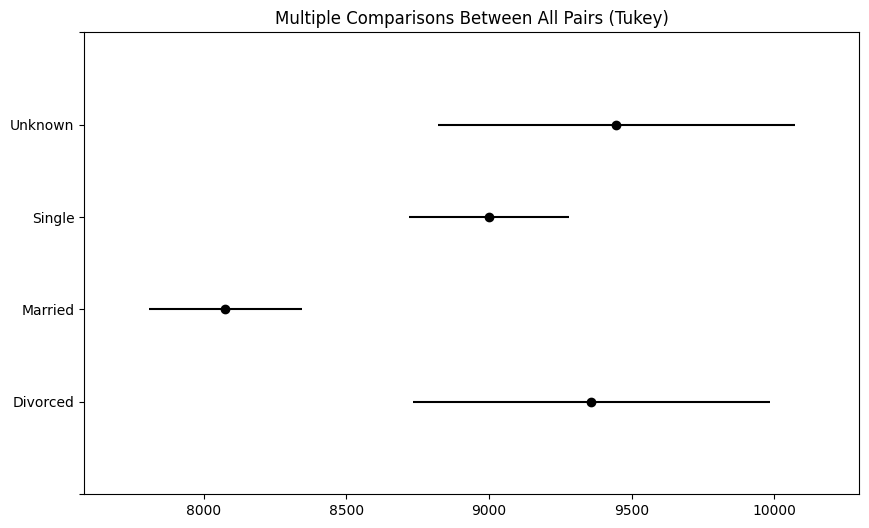

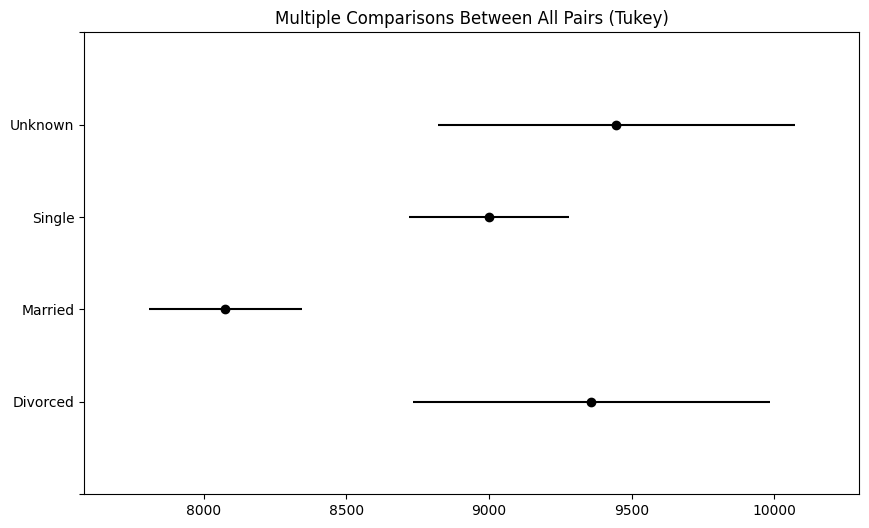

In [257]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv',index_col=0)
df.head(3)

import statsmodels.api as sm
from statsmodels.formula.api import ols


## 4. ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù
# ÏÑ∏ ÏßëÎã® ÏÇ¨Ïù¥Ïùò ÌÜµÍ≥Ñ Í≤ÄÏ†ï
# X 1Í∞ú Y 1Í∞ú


# X : Martial_Status
# Y : Credit Limit

# 4.1) Î™®ÏàòÏ†Å ÏùºÎñÑ,
model = ols('Credit_Limit ~ C(Marital_Status)', data = df).fit()
table = sm.stats.anova_lm(model)

display(table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['Credit_Limit'] ,
                          groups = df['Marital_Status'] ,
                          alpha = 0.05)

print(tukey)
tukey.plot_simultaneous()


In [258]:
# 4.2) Ï†ïÍ∑úÏÑ± O / Îì±Î∂ÑÏÇ∞ÏÑ± Î∂àÎßåÏ°± : Welch`s Anova
import pingouin as pg
res = pg.welch_anova(dv = 'Credit_Limit', between = 'Marital_Status' , data = df)
display(res)


# Games-Howell Post-hoc
gh = pg.pairwise_gameshowell(dv='Credit_Limit', between='Marital_Status', data=df)
print("\nGames-Howell Post-hoc:\n", gh)

Source  ddof1        ddof2          F         p-unc      np2
0  Marital_Status      3  2009.361048  11.665557  1.406893e-07  0.00343


Games-Howell Post-hoc:
           A        B      mean(A)      mean(B)         diff          se  \
0  Divorced  Married  9358.565107  8076.661895  1281.903212  369.465050   
1  Divorced   Single  9358.565107  8999.684758   358.880349  378.646254   
2  Divorced  Unknown  9358.565107  9445.283178   -86.718071  492.671396   
3   Married   Single  8076.661895  8999.684758  -923.022863  195.920135   
4   Married  Unknown  8076.661895  9445.283178 -1368.621283  371.129112   
5    Single  Unknown  8999.684758  9445.283178  -445.598420  380.270141   

          T           df      pval    hedges  
0  3.469620   952.112931  0.003053  0.146907  
1  0.947798  1046.229337  0.778988  0.037952  
2 -0.176016  1494.970946  0.998063 -0.009094  
3 -4.711220  8057.207887  0.000015 -0.102628  
4 -3.687723   951.213282  0.001364 -0.156694  
5 -1.171794  1044.421475  0.644831 -0.047078  


In [259]:
# 4.3) Ï†ïÍ∑úÏÑ± X / Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± OR Ï†ïÍ∑ú, Îì±Î∂ÑÏÇ∞ÏÑ± Î∂àÎßåÏ°± - Krusal-Wallis
import scikit_posthocs as sp
k = df[['Marital_Status', 'Credit_Limit']]

g = [group['Credit_Limit'] for name, group in k.groupby('Marital_Status') ]
stat, p_val = stats.kruskal(* g)
print(p_val)


# ÏÇ¨ÌõÑÍ≤ÄÏ†ï
dunn = sp.posthoc_dunn(df,
                        val_col = 'Credit_Limit',
                        group_col = 'Marital_Status',
                        p_adjust = 'bonferroni')

print(dunn)



2.7505962269323914e-05
          Divorced   Married    Single   Unknown
Divorced  1.000000  0.008024  0.960045  1.000000
Married   0.008024  1.000000  0.006883  0.002052
Single    0.960045  0.006883  1.000000  0.457752
Unknown   1.000000  0.002052  0.457752  1.000000


#### 5.Ïßù ÏßÄÏùÄ ANOVA

In [260]:
## 5.Ïßù ÏßÄÏùÄ ANOVA
# ÎåÄÏÉÅÏóêÍ≤å A,B,CÎ•º Ï†ÑÍ≥º ÌõÑÎ°ú Î≥µÏö© ÏãúÌÇ¥
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/Repeated%20Measures%20ANOVA.csv')
print(df.head(3))

df.Drug.value_counts()

   Subject Drug  Time      Score
0        1    A   Pre  51.490142
1        1    A  Post  54.585207
2        1    B   Pre  56.943066


Drug
A    40
B    40
C    40
Name: count, dtype: int64

('A', 'Post') 0.30069692411114524 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('A', 'Pre') 0.315455375680571 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'Post') 0.7035818981385875 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'Pre') 0.9989769414103544 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('C', 'Post') 0.8451329583368944 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('C', 'Pre') 0.8554116275919448 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
Drug       78.5250 2.0000 38.0000 0.0000
Time      124.7940 1.0000 19.0000 0.0000
Drug:Time   1.0263 2.0000 38.0000 0.3681



[  Contrast  A  B  Paired  Parametric          T   dof alternative  \
 0     Drug  A  B    True        True  -3.894778  19.0   two-sided   
 1     Drug  A  C    True        True -10.698615  19.0   two-sided   
 2     Drug  B  C    True        True  -5.500891  19.0   two-sided   
 
           p-unc        p-corr p-adjust       BF10    hedges  
 0  9.743609e-04  9.743609e-04     holm     37.406 -1.326441  
 1  1.754440e-09  5.263319e-09     holm  6.323e+06 -3.658381  
 2  2.629882e-05  5.259765e-05     holm    920.291 -1.664015  ,
   Contrast  A  B  Paired  Parametric         T   dof alternative  \
 0     Drug  A  B    True        True -5.366027  19.0   two-sided   
 1     Drug  A  C    True        True -8.376233  19.0   two-sided   
 2     Drug  B  C    True        True -4.239534  19.0   two-sided   
 
           p-unc        p-corr p-adjust       BF10    hedges  
 0  3.533347e-05  7.066695e-05     holm    705.731 -1.733393  
 1  8.412566e-08  2.523770e-07     holm  1.745e+05 -2.677706 

[  Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  5.215615  19.0   two-sided   
 
       p-unc     BF10    hedges  
 0  0.000049  524.145  1.546463  ,
   Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  7.428475  19.0   two-sided   
 
           p-unc       BF10    hedges  
 0  4.949212e-07  3.414e+04  2.291028  ,
   Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  6.139815  19.0   two-sided   
 
       p-unc      BF10    hedges  
 0  0.000007  3173.952  1.826355  ]

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Divorced Married -1281.9032 0.0019 -2199.9543 -363.8521   True
Divorced  Single  -358.8803 0.7542 -1288.7753  571.0146  False
Divorced Unknown    86.7181 0.9978 -1118.5525 1291.9886  False
 Married  Single   923.0229    0.0   419.1629 1426.8829   True
 Married Unknown  1368.6213 0.0007   451.0988 2286.1437   True
  Single Unknown   445.5984 0.6065  -483.7746 1374.9714  False
--------------------------------------------------------------


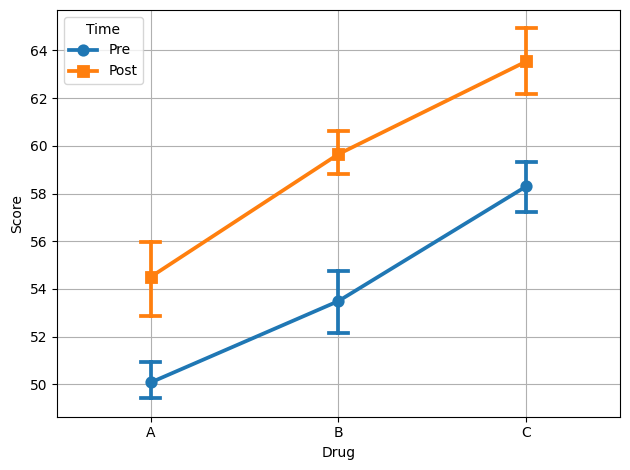

In [261]:
## 5.1 Î™®ÏàòÏùºÎïå - PivotingÏùÑ ÌïòÏßÄÏïäÍ≥† ÏÇ¨Ïö©
# Ï°∞Í±¥ Drug, TimeÏóê ÎåÄÌïú Íµ¨Ï°∞Î°ú Ìï¥ÏïºÌï®

# Í∞ÄÏÑ§
# 1. Drug Ï£ºÌö®Í≥º
# Í∑ÄÎ¨¥ : A,B,C Ïóê ÎåÄÌïú ÌèâÍ∑† Î∞òÏùëÍ∞íÏùÄ ÎèôÏùºÌïòÎã§
# 2. Time Ï£ºÌö®Í≥º
# Í∑ÄÎ¨¥ : Pre, PostÍ∞Ñ ÌèâÍ∑† Î∞òÏùë Í∞íÏùÄ ÎèôÏùºÌïòÎã§.
# 3. Drug X Time ÏÉÅÌò∏ÏûëÏö©
# Í∑ÄÎ¨¥ : DrugÏùò Ìö®Í≥ºÍ∞Ä TimeÏóê Îî∞Îùº Î≥ÄÌïòÏßÄ ÏïäÎäîÎã§.


# 5.1.1 Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
for key, group in df.groupby(['Drug','Time']) :
  stat, p_val = stats.shapiro(group['Score'])
  decision = 'Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§' if p_val < 0.05 else 'Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§'
  print(key, p_val, decision)

# 5.1.2 AnovaRM
from statsmodels.stats.anova import AnovaRM

model = AnovaRM(df,
                depvar = 'Score',
                subject = 'Subject',
                within = ['Drug','Time']).fit()

print(model)


# 5.1.3 AnovaRM - ÏÇ¨ÌõÑÍ≤ÄÏ†ï
# Î∞©Î≤ï) Drug / Time Îî∞Î°ú ÌôïÏù∏ Ìïú ÌõÑ, ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÏûàÎäî Í≤ΩÏö∞ÏóêÎäî Drug + TimeÏúºÎ°ú Î≥∏Îã§.

# 5.1.3.1 Drug ÎπÑÍµê - TimeÎ≥ÑÎ°ú Ï™ºÍ∞úÏÑú tÍ≤ÄÏ†ï
drug = []
for t  in df['Time'].unique() :
  target = df[df['Time'] == t]
  drug_test = pg.pairwise_ttests(dv = "Score",
                                 within = "Drug" ,
                                 subject = 'Subject' ,
                                 data = target,
                                 padjust = 'holm',
                                 effsize = "hedges")
  drug.append(drug_test)
display(drug)

# 5.1.3.2 Time ÎπÑÍµê - DrugÎ≥ÑÎ°ú Ï™ºÍ∞úÏÑú TÍ≤ÄÏ†ï
time = []
for d  in df['Drug'].unique() :
  target = df[df['Drug'] == d]
  time_test = pg.pairwise_ttests(dv = 'Score',
                                within = 'Time' ,
                                subject = "Subject" ,
                                data = target,
                                padjust = 'holme',
                                effsize = "hedges")

  time.append(time_test)

display(time)


# 5.1.3.3 ÏÉÅÌò∏ÏûëÏö© Í≤ÄÏ†ï (ÏûàÎã§Í≥† Í∞Ä)
df['comb'] = df['Drug'] + df['Time']

cell_posthoc = pg.pairwise_ttests(dv='Score', within='comb', subject='Subject',
                                  data=df, padjust='holm', effsize='hedges')

print(tukey)

sns.pointplot(data = df,
              x = 'Drug' , y = 'Score', hue = 'Time', markers=['o', 's'], capsize=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [262]:
## 5.1 ÎπÑÎ™®ÏàòÏùºÎïå(1),
pivot_df = df.pivot_table(index = ['Subject' ,'Drug'] ,
                          columns = 'Time',
                          values = 'Score').reset_index()

pivot_df['diff'] = pivot_df['Post'] - pivot_df['Pre']
display(pivot_df.head(4))

pivot_re = pivot_df.pivot(index = 'Subject', columns = 'Drug', values = 'diff')
display(pivot_re.head(4))


from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(pivot_re['A'], pivot_re['B'], pivot_re['C'])
print(f"Friedman Œî(Post-Pre) across Drugs: stat={stat:.3f}, p={p:.4f}")


# ÏÇ¨ÌõÑÎ∂ÑÏÑù
dunn = sp.posthoc_dunn(pivot_df,
                       val_col = 'diff' ,
                       group_col = 'Drug' ,
                       p_adjust = 'bonferroni')

Time  Subject Drug       Post        Pre      diff
0           1    A  54.585207  51.490142  3.095065
1           1    B  64.569090  56.943066  7.626024
2           1    C  62.297589  57.297540  5.000049
3           2    A  57.302304  54.737638  2.564666

Drug            A         B         C
Subject                              
1        3.095065  7.626024  5.000049
2        2.564666  8.036103  4.993064
3       -1.465728  8.487891  8.981235
4        3.487161 -0.074275  0.523171

Friedman Œî(Post-Pre) across Drugs: stat=2.100, p=0.3499


      Ï∞®Îüâ A  Ï∞®Îüâ B  Ï∞®Îüâ C
ÌîºÌóòÏûê1     4     1     6
ÌîºÌóòÏûê2     3     4     6
ÌîºÌóòÏûê3     2     4     6
ÌîºÌóòÏûê4     4     3     2
ÌîºÌóòÏûê5     4     1     6
ÌîºÌóòÏûê6     6     4     2
ÌîºÌóòÏûê7     5     3     5
ÌîºÌóòÏûê8     6     3     2
ÌîºÌóòÏûê9     2     4     6
0.8668778997501834
          0         1         2
0  1.000000  0.687513  0.884741
1  0.687513  1.000000  0.397199
2  0.884741  0.397199  1.000000
          Ï∞®Îüâ A      Ï∞®Îüâ B      Ï∞®Îüâ C
Ï∞®Îüâ A  1.000000  0.656077  1.000000
Ï∞®Îüâ B  0.656077  1.000000  0.167109
Ï∞®Îüâ C  1.000000  0.167109  1.000000


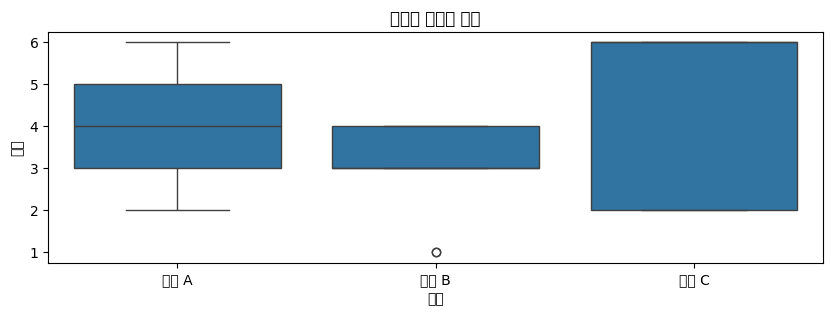

In [263]:
## 5.1 ÎπÑÎ™®ÏàòÏùºÎïå(2)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò
data = {
    'Ï∞®Îüâ A': [4, 3, 2, 4, 4, 6, 5, 6, 2],
    'Ï∞®Îüâ B': [1, 4, 4, 3, 1, 4, 3, 3, 4],
    'Ï∞®Îüâ C': [6, 6, 6, 2, 6, 2, 5, 2, 6]
}
# Ïù∏Îç±Ïä§ Ï†ïÏùò
index = ['ÌîºÌóòÏûê1', 'ÌîºÌóòÏûê2', 'ÌîºÌóòÏûê3', 'ÌîºÌóòÏûê4', 'ÌîºÌóòÏûê5', 'ÌîºÌóòÏûê6', 'ÌîºÌóòÏûê7', 'ÌîºÌóòÏûê8', 'ÌîºÌóòÏûê9']

# DataFrame ÏÉùÏÑ±
df = pd.DataFrame(data, index=index)

# Ï∂úÎ†•
print(df)
df2 = df.reset_index(drop = 'index')
stat , p = friedmanchisquare(df2.values[0] , df2.values[1], df2.values[2])
print(p)
# ÏÇ¨ÌõÑÎ∂ÑÏÑù -Friedman : Nemenyi Test - valueÎ°ú Í≤ÄÏ†ï
post = sp.posthoc_nemenyi_friedman(df.values)
print(post)

# ÏÇ¨ÌõÑÎ∂ÑÏÑù Dunn - metling Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
df_melt = df.melt(var_name = 'Ï∞®Îüâ', value_name ='Ï†êÏàò')
dunn = sp.posthoc_dunn(df_melt, val_col = 'Ï†êÏàò', group_col ='Ï∞®Îüâ', p_adjust ='bonferroni')
print(dunn)

df_melted = df.melt(var_name='Ï∞®Îüâ', value_name='Ï†êÏàò')
plt.figure(figsize=(10,3))
sns.boxplot(data=df_melted, x='Ï∞®Îüâ', y='Ï†êÏàò')
plt.title('Ï∞®ÎüâÎ≥Ñ ÎßåÏ°±ÎèÑ Î∂ÑÌè¨')
plt.show()


#### 6. Two Way Anova

In [264]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

0.04086062802220418
                  sum_sq    df          F        PR(>F)
C(am)          36.766919   1.0   3.998759  5.608373e-02
C(cyl)        456.400921   2.0  24.819011  9.354735e-07
C(am):C(cyl)   25.436511   2.0   1.383233  2.686140e-01
Residual      239.059167  26.0        NaN           NaN


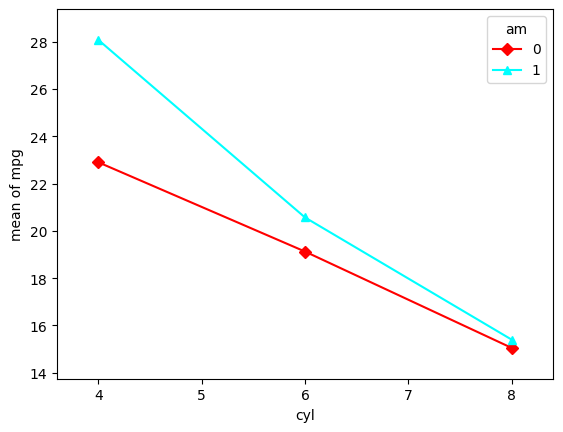

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0_4    0_6   -3.775 0.5872 -10.8906  3.3406  False
   0_4    0_8    -7.85 0.0054 -13.8638 -1.8362   True
   0_4    1_4    5.175 0.1547  -1.1323 11.4823  False
   0_4    1_6  -2.3333 0.9315  -9.9402  5.2735  False
   0_4    1_8     -7.5 0.1073 -16.0047  1.0047  False
   0_6    0_8   -4.075 0.2192  -9.4539  1.3039  False
   0_6    1_4     8.95 0.0007   3.2448 14.6552   True
   0_6    1_6   1.4417 0.9883  -5.6739  8.5572  False
   0_6    1_8   -3.725 0.7159 -11.7933  4.3433  False
   0_8    1_4   13.025    0.0   8.7726 17.2774   True
   0_8    1_6   5.5167 0.0859  -0.4971 11.5304  False
   0_8    1_8     0.35    1.0  -6.7656  7.4656  False
   1_4    1_6  -7.5083 0.0129 -13.8156 -1.2011   True
   1_4    1_8  -12.675 0.0002 -20.0403 -5.3097   True
   1_6    1_8  -5.1667 0.4437 -13.6714  3.3381  False
----------------------------

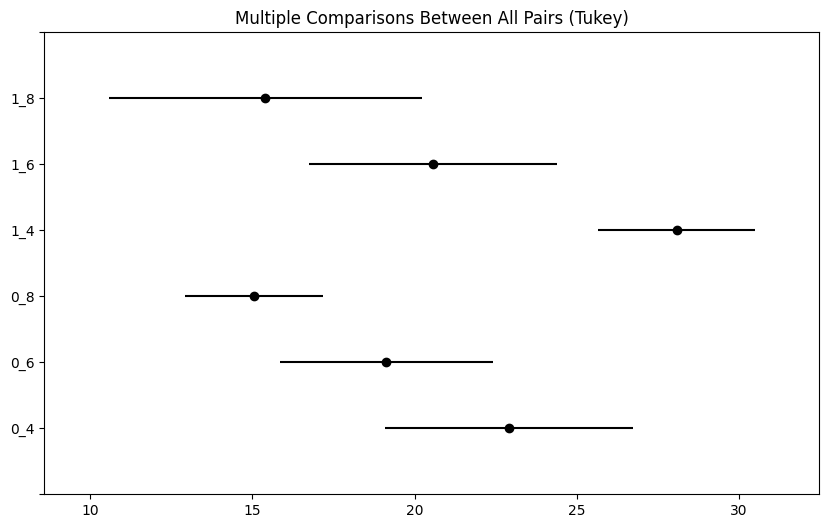

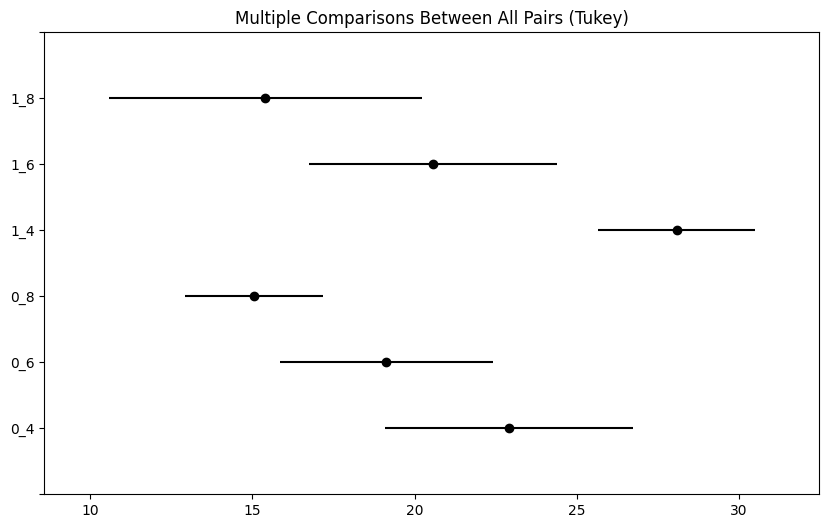

In [265]:
# 6.1 Î™®ÏàòÏ†Å Í≤ÄÏ¶ù
# 6.1.1 Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# amÍ≥º cylÏóê ÎåÄÌó§ÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨Ïù∏ÏßÄ ÌôïÏù∏ÌïúÎã§.
cols = ['am','cyl']

sha = []
for key, group  in df.groupby(cols) :
  stat, p_val = stats.shapiro(group['mpg'])
  sha.append([key, p_val])

pd.DataFrame(sha)

# 6.1.2 Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏
g = [group['mpg'] for name, group in df.groupby(cols)]
lstat, lpval = stats.levene(*g)
print(lpval)

# 6.1.3 Î™®Îç∏
model = ols('mpg ~ C(am) * C(cyl)', data = df).fit()
ano = anova_lm(model, typ = 2)
print(ano)

# 6.1.4 ÏÇ¨ÌõÑÍ≤ÄÏ†ï
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df['cyl'] , df['am'] , df['mpg'] , markers = ['D','^'])
plt.show()


# ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÏûàÍ∏∞ ÎñÑÎ¨∏Ïóê, GroupÎ≥ÑÎ°ú ÌôïÏù∏
df['group'] = df['am'].astype(str) + '_' +  df['cyl'].astype(str)
tukey = pairwise_tukeyhsd(endog = df['mpg'] ,
                          groups = df['group'],
                          alpha = 0.05)

print(tukey)
tukey.plot_simultaneous()

In [266]:
# 6.2 ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ¶ù
# Ï°∞Í±¥ : Ï†ïÍ∑úÏÑ±/Îì±Î∂ÑÏÇ∞ÏÑ± ÏúÑÎ∞∞ ÌòπÏùÄ ÏàúÏÑú Ï≤ôÎèÑ

# 6.2.1 ÎπÑÎ™®Ïàò Î™®Îç∏ Íµ¨ÌòÑ
def ray_hare(data, dv, f1, f2) :
  data = data.copy()
  data['rank'] = stats.rankdata(data[dv])

  data['combo'] = data[f1].astype(str) + '_' + data[f2].astype(str)

  # Í∞Å ÏöîÏù∏Ïóê ÎåÄÌïú ANOVA
  f = 'rank ~ C({}) + C({}) + C(combo)'.format(f1, f2)
  model = ols(f , data = data).fit()
  anova_table = sm.stats.anova_lm(model)

  # Step 4: HÍ∞í Í≥ÑÏÇ∞ (ANOVA SSÎ•º Í∏∞Î∞òÏúºÎ°ú)
  anova_table['H'] = (12 / (len(data) * (len(data)+1))) * anova_table['sum_sq']
  anova_table['p-unc'] = 1 - stats.chi2.cdf(anova_table['H'], anova_table['df'])

  return anova_table[['df', 'sum_sq', 'H', 'p-unc']]

result = ray_hare(df, dv = 'mpg' , f1 = 'am', f2 = 'cyl')
result


# 6.2.2 ÏÇ¨ÌõÑÍ≤ÄÏ†ï -
# ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ïú†ÏùòÌï†Îïå - ÏåçÎ≥Ñ Man-Whitney U Test
# ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÑ Îïå, am / cyl Îî∞Î°ú Ï£ºÌö®Í≥º Îã®ÏúÑÎ°ú Î≥¥Ï†ï

# 6.2.2.1 ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ïú†ÏùòÌï†Îïå,
from itertools import combinations
group = df['group'].unique()
pairs = list(combinations(group, 2))

res = []
for v1, v2 in pairs :
  data1 = df.loc[df['group'] == v1]['mpg']
  data2 = df.loc[df['group'] == v2]['mpg']

  stat, p_val = stats.mannwhitneyu(data1, data2)
  res.append({
      'v1' : v1,
      'v2' : v2,
      'P_value' : p_val ,
      'Decision' : 'Ï∞®Ïù¥Í∞Ä ÏóÜÎã§' if p_val > 0.05 else 'Ï∞®Ïù¥Í∞Ä ÏûàÎã§'
      })

print(pd.DataFrame(res))


# 6.2.2.2 ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÑÎïå - Ï£ºÌö®Í≥ºÎßå Í≤ÄÏ†ï
# am (2 ÏàòÏ§Ä) / cyl (3 ÏàòÏ§Ä) - Í∞ÅÍ∞Å ÎßåÌúòÌä∏ÎãàÏôÄ ÌÅ¨Î£®Ïä§Ïπº ÎπÑÍµê Ïã§Ìñâ
cols = ['am','cyl']

res = []
for col in cols :
  levels = sorted(df[col].unique())
  k = len(levels)

  if k == 2 :
    g1 = df.loc[df[col] == levels[0], 'mpg'].values
    g2 = df.loc[df[col] == levels[1], 'mpg'].values

    stat, p_val = stats.mannwhitneyu(g1, g2, alternative = 'two-sided')
    res.append([col, 'Mann‚ÄìWhitney U', p_val])


  else :
    group  = [group['mpg'].values for name, group in df.groupby(col)]
    stat, p_val = stats.kruskal(* group)
    res.append([col, 'Kruskal‚ÄìWallis', float(p_val)])

print(res)


     v1   v2   P_value Decision
0   1_6  1_4  0.018365   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
1   1_6  0_6  0.372456   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
2   1_6  0_8  0.011319   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
3   1_6  0_4  0.076523   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
4   1_6  1_8  0.138641   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
5   1_4  0_6  0.010571   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
6   1_4  0_8  0.000244   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
7   1_4  0_4  0.151171   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
8   1_4  1_8  0.049491   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
9   0_6  0_8  0.020933   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
10  0_6  0_4  0.057143   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
11  0_6  1_8  0.133333   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
12  0_8  0_4  0.011392   Ï∞®Ïù¥Í∞Ä ÏûàÎã§
13  0_8  1_8  0.927105   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
14  0_4  1_8  0.200000   Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
[['am', 'Mann‚ÄìWhitney U', np.float64(0.0018713913331785542)], ['cyl', 'Kruskal‚ÄìWallis', 2.5662167953453215e-06]]


#### 7. N-Way ANOVA (GLMÍ∏∞Î∞ò ANOVA)

In [267]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

Ï°∞Ìï©  shapiro p_val shapiro decision  Levene pval Levene Decision
0  (4, 1, 4)       0.538379           Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§     0.077087           Îì±Î∂ÑÏÇ∞Ïù¥Îã§
1  (8, 0, 3)       0.504114           Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§     0.077087           Îì±Î∂ÑÏÇ∞Ïù¥Îã§

# n-way ANOVA Í≤∞Í≥º
                          sum_sq    df          F    PR(>F)
Intercept             462.250000   1.0  43.573301  0.000001
C(cyl)                 69.034333   2.0   3.253709  0.057825
C(am)                  58.157067   1.0   5.482088  0.028677
C(gear)                14.893778   2.0   0.701970  0.506373
C(cyl):C(am)           23.610001   2.0   1.112781  0.346447
C(cyl):C(gear)         26.775837   4.0   0.630996  0.602791
C(am):C(gear)          59.408333   2.0   2.800019  0.082536
C(cyl):C(am):C(gear)   32.090847   4.0   0.756249  0.530572
Residual              233.388333  22.0        NaN       NaN


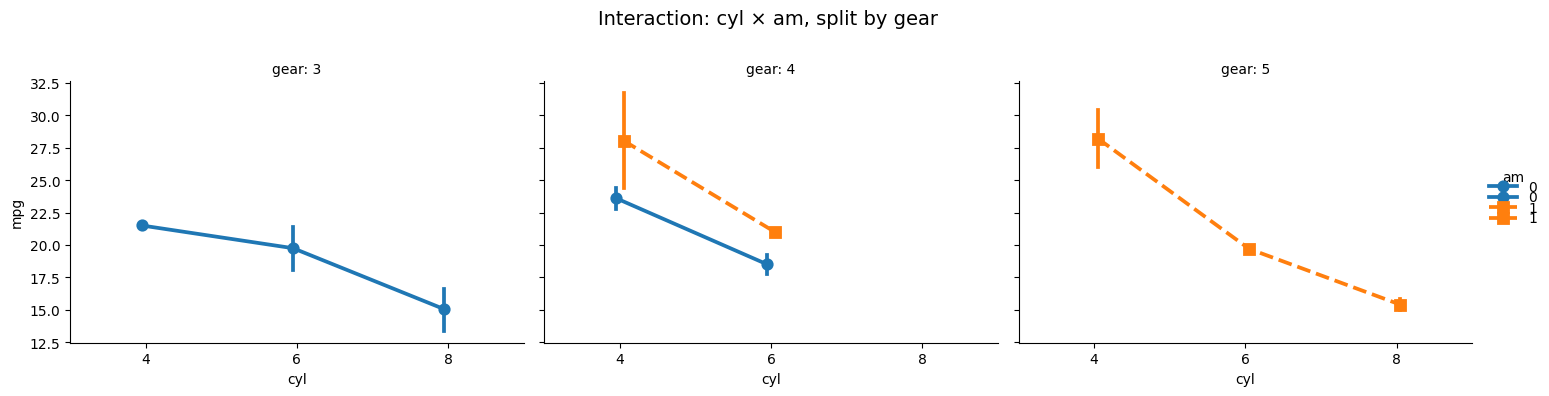

group1 group2  meandiff   p-adj    lower    upper  reject
0     043    044    2.1000  0.9999 -11.8827  16.0827   False
1     043    063   -1.7500  1.0000 -15.7327  12.2327   False
2     043    064   -3.0000  0.9986 -16.9827  10.9827   False
3     043    083   -6.4500  0.6676 -18.3330   5.4330   False
4     043    144    6.5333  0.6951  -5.7983  18.8649   False
5     043    145    6.7000  0.7950  -7.2827  20.6827   False
6     043    164   -0.5000  1.0000 -14.4827  13.4827   False
7     043    165   -1.8000  1.0000 -17.9459  14.3459   False
8     043    185   -6.1000  0.8663 -20.0827   7.8827   False
9     044    063   -3.8500  0.9678 -15.2669   7.5669   False
10    044    064   -5.1000  0.8503 -16.5169   6.3169   False
11    044    083   -8.5500  0.0576 -17.2698   0.1698   False
12    044    144    4.4333  0.8015  -4.8885  13.7552   False
13    044    145    4.6000  0.9105  -6.8169  16.0169   False
14    044    164   -2.6000  0.9979 -14.0169   8.8169   False
15    044    165   -3.9000  0.9907 -17.8827  10.0827   False
16    044    185   -8.2000  0.3120 -19.6169   3.2169   False
17    063    064   -1.2500  1.0000 -12.6669  10.1669   False
18    063    083   -4.7000  0.6757 -13.4198   4.0198   False
19    063    144    8.2833  0.1100  -1.0385  17.6052   False
20    063    145    8.4500  0.2768  -2.9669  19.8669   False
21    063    164    1.2500  1.0000 -10.1669  12.6669   False
22    063    165   -0.0500  1.0000 -14.0327  13.9327   False
23    063    185   -4.3500  0.9339 -15.7669   7.0669   False
24    064    083   -3.4500  0.9188 -12.1698   5.2698   False
25    064    144    9.5333  0.0423   0.2115  18.8552    True
26    064    145    9.7000  0.1424  -1.7169  21.1169   False
27    064    164    2.5000  0.9984  -8.9169  13.9169   False
28    064    165    1.2000  1.0000 -12.7827  15.1827   False
29    064    185   -3.1000  0.9923 -14.5169   8.3169   False
30    083    144   12.9833  0.0000   7.2749  18.6918    True
31    083    145   13.1500  0.0009   4.4302  21.8698    True
32    083    164    5.9500  0.3757  -2.7698  14.6698   False
33    083    165    4.6500  0.9235  -7.2330  16.5330   False
34    083    185    0.3500  1.0000  -8.3698   9.0698   False
35    144    145    0.1667  1.0000  -9.1552   9.4885   False
36    144    164   -7.0333  0.2552 -16.3552   2.2885   False
37    144    165   -8.3333  0.3881 -20.6649   3.9983   False
38    144    185  -12.6333  0.0031 -21.9552  -3.3115    True
39    145    164   -7.2000  0.4785 -18.6169   4.2169   False
40    145    165   -8.5000  0.5267 -22.4827   5.4827   False
41    145    185  -12.8000  0.0200 -24.2169  -1.3831    True
42    164    165   -1.3000  1.0000 -15.2827  12.6827   False
43    164    185   -5.6000  0.7739 -17.0169   5.8169   False
44    165    185   -4.3000  0.9821 -18.2827   9.6827   False

In [268]:
# 1.Ï†ïÍ∑ú / Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
cols = df[['cyl','am','gear']].columns.to_list()

res =[]
for key, group in df.groupby(cols) :
  # ÏÉòÌîåÏùò ÏàòÍ∞Ä 3Í∞ú Ïù¥ÏÉÅÏù¥Î©¥ Ïù¥ÎùºÎäî Í∞ÄÏ†ïÏùÑ Ï£ºÏñ¥ÏÑú Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
  if len(group) >= 3 :
    stat, p = stats.shapiro(group['mpg'])
    s_decision = 'Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§' if p < 0.05 else 'Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§'

    res.append({
        'Ï°∞Ìï©' : key,
        'shapiro p_val' : p,
        'shapiro decision' : s_decision
    })

g = [group['mpg'] for name, group in df.groupby(cols)]
stat, leven_p = stats.levene(*g)
l_decision = 'Îì±Î∂ÑÏÇ∞ ÏïÑÎãàÎã§' if leven_p < 0.05 else 'Îì±Î∂ÑÏÇ∞Ïù¥Îã§'

res = pd.DataFrame(res)
res['Levene pval'] = leven_p
res['Levene Decision'] = l_decision
display(res)


# 7.1 Î™®ÏàòÏ†Å ÎåÄÏïàÏùºÎïå,
# 1. 3ÏöîÏù∏ ANOVA
model = ols('mpg ~ C(cyl) * C(am) * C(gear)', data=df).fit()
res = sm.stats.anova_lm(model, typ=3)
print("# n-way ANOVA Í≤∞Í≥º")
print(res)

# 2. 3ÏöîÏù∏ ÍµêÌò∏ÏûëÏö© ÏãúÍ∞ÅÌôî: gear Î≥ÑÎ°ú cyl x am
# interaction_plot ÎåÄÏ≤¥ > sns.catplot
g = sns.catplot(
    data=df, kind='point',
    x='cyl', y='mpg', hue='am',
    col='gear', dodge=True,
    height=4, aspect=1.2,
    markers=["o", "s"], linestyles=["-", "--"]
)

g.set_axis_labels("cyl", "mpg")
g.set_titles("gear: {col_name}")
g.add_legend()

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Interaction: cyl √ó am, split by gear", fontsize=14)
plt.show()

# 3. ÏÇ¨ÌõÑÎ∂ÑÏÑù
df['group'] = df['am'].astype(str) + df['cyl'].astype(str) + df['gear'].astype(str)
tukey = pairwise_tukeyhsd(df['mpg'], df['group'])
pd.DataFrame(tukey.summary().data[1:] , columns = tukey.summary().data[0])


In [269]:
# N-way ANOVAÏùò ÎπÑÎ™®Ïàò ÎåÄÏïà - ÏßÅÏ†ëÍµ¨ÌòÑ
from statsmodels.api import stats as sm_stats
from scipy.stats import rankdata, chi2

def ray_hare(data, dv, f1, f2, f3) :
  df = data.copy()
  df['rank'] = rankdata(df[dv])
  df['factor1'] = df[f1].astype(str) + "_" + df[f2].astype(str)
  df['factor2'] = df[f1].astype(str) + "_" + df[f3].astype(str)
  df['factor3'] = df[f2].astype(str) + "_" + df[f3].astype(str)
  df['all'] = df[f1].astype(str) + "_" + df[f2].astype(str) + "_" + df[f3].astype(str)

  f = f'rank ~ C({f1}) + C({f2}) + C({f3}) + C(factor1) + C(factor2) + C(factor3) + C(all)'
  model = ols(f, data = df).fit()
  table = anova_lm(model, typ = 2)

  return table

print(ray_hare(df, dv ='mpg', f1 = 'cyl', f2 = 'am', f3 = 'gear'))


# ÏÇ¨ÌõÑÍ≤ÄÏ†ï - Ï°∞Ìï©Î≥Ñ Ï§ëÏïôÍ∞íÏùò Ï∞®Ïù¥
# Ï°∞Ìï© ÏÉùÏÑ±
df['group']= df.apply(lambda x : str(x['cyl']) +"_"+ str(x['am']) + "_" +str(x['gear']), axis = 1)

res = []
for g1, g2 in combinations(df['group'].unique(),2) :
  v1 = df[df['group'] == g1]['mpg']
  v2 = df[df['group'] == g2]['mpg']

  stat, p = stats.mannwhitneyu(v1, v2)
  res.append([v1, v2, p])

display(pd.DataFrame(res).head(4))

                 sum_sq    df          F        PR(>F)
C(cyl)       399.493322   2.0  10.728471  5.597558e-04
C(am)          0.550817   1.0   0.029585  8.650086e-01
C(gear)       17.264371   2.0   0.463638  6.349981e-01
C(factor1)  1249.399216   5.0  13.421144  4.560016e-06
C(factor2)  1473.417304   7.0  11.305403  5.155045e-06
C(factor3)    20.278060   3.0   0.363048  7.802963e-01
C(all)      2314.895833   9.0  13.814885  3.809231e-07
Residual     409.604167  22.0        NaN           NaN


0  \
0  0    21.0
1    21.0
Name: mpg, dtype: float64   
1  0    21.0
1    21.0
Name: mpg, dtype: float64   
2  0    21.0
1    21.0
Name: mpg, dtype: float64   
3  0    21.0
1    21.0
Name: mpg, dtype: float64   

                                                   1         2  
0  2     22.8
17    32.4
18    30.4
19    33.9
25...  0.065133  
1      3    21.4
5    18.1
Name: mpg, dtype: float64  1.000000  
2  4     18.7
6     14.3
11    16.4
12    17.3
13...  0.035156  
3      7    24.4
8    22.8
Name: mpg, dtype: float64  0.220671

#### 8. MANOVA
- Ï¢ÖÏÜçÎ≥ÄÏàò : Î∞òÎìúÏãú 2Í∞ú Ïù¥ÏÉÅ
- ÏöîÏù∏ : 1Í∞ú Ïù¥ÏÉÅ

In [270]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/MANOVA.csv')
df.head(4)

Group Gender       Math    Reading
0     A      M  72.483571  74.446943
1     A      M  73.238443  81.092119
2     A      M  68.829233  74.063452
3     A      M  77.896064  78.069739

('A', 'F') 0.06101433965645336 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('A', 'M') 0.8586336009052661 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'F') 0.26173385806869065 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'M') 0.6172114488849136 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('C', 'F') 0.7157623239356475 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('C', 'M') 0.5174523085109054 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('A', 'F') 0.24075166346116272 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('A', 'M') 0.7770972410993161 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'F') 0.7117620532186558 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('B', 'M') 0.18665695961311785 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
('C', 'F') 0.03490915030607052 Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§
('C', 'M') 0.442272628500209 Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0096 2.0000 113.0000 5824.2495 0.0000
         Pillai's trace  

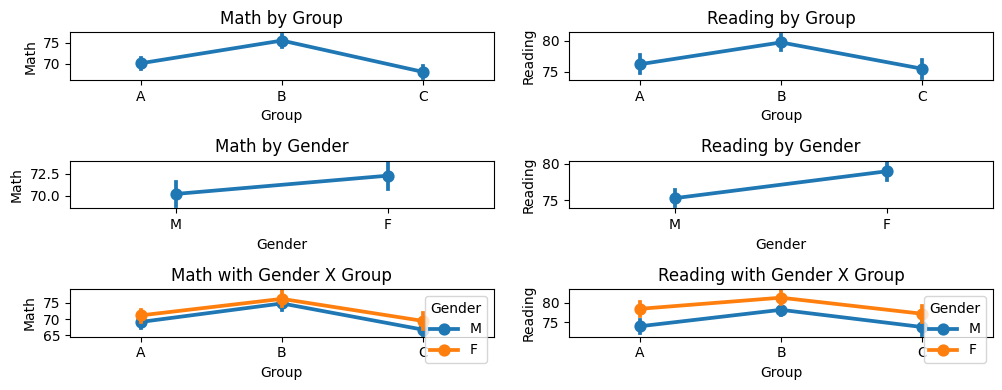

In [271]:
# YÍ∞íÏù¥ Match, Reading ÏúºÎ°ú Ïó¨Îü¨Í∞ú
# ÏöîÏù∏ÏùÄ Group + Gender (2ÏöîÏù∏) - Î≤îÏ£ºÌòï

# 1.Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï
for y in ['Math','Reading'] :
  for key, group in df.groupby(['Group','Gender']) :
    stat, p_val = stats.shapiro(group[y])
    decision = 'Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§' if p_val < 0.05  else 'Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§'
    print(key, p_val, decision)


# 2. MANOVA ÏàòÌñâ
from statsmodels.multivariate.manova import MANOVA
df['Group_Gender'] = df['Group'] + "_" + df['Gender']

result = MANOVA.from_formula("Math + Reading ~ Group * Gender", data = df).mv_test()
print(result)


# 3. ÏÇ¨ÌõÑÎ∂ÑÏÑù
factors = ['Group','Gender']
y = ['Math','Reading']

res = []
for f in factors :
  for y_var in y :
    # Í∞Å ÏöîÏù∏Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í
    cnt = df[f].unique()
    if len(cnt) == 2 :
      levels = sorted(df[f].unique())
      g1 = df[df[f] == levels[0]][y_var]
      g2 = df[df[f] == levels[1]][y_var]

      # ttest_ind
      stat, p_val = stats.ttest_ind(g1, g2)
      res.append({
          'Factor' : f,
          'p_value' : p_val  })

    else :
      model = ols(f"{y_var} ~ C({f})", data = df).fit()
      tukey = pairwise_tukeyhsd(df[y_var], df[f])
      tukey_df = pd.DataFrame(tukey._results_table.data[1:],
                              columns = tukey._results_table[0:])


  print(pd.DataFrame(res))
  print(tukey_df)


  ## ÏÇ¨ÌõÑÎ∂ÑÏÑùÏùò ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(3,2,figsize = (10, 4))

for i, factor in enumerate(factors) :
  for j, y_value in enumerate(y) :
    ax = axes[i][j]
    sns.pointplot(data = df, x = factor, y = y_value, ax = ax)
    ax.set_title(f'{y_value} by {factor}')


for j, y_value in enumerate(y) :
  ax = axes[2][j]
  sns.pointplot(data = df, x = 'Group' , y = y_value, hue = 'Gender', ax = ax)
  ax.set_title(f'{y_value} with Gender X Group')

plt.tight_layout()
plt.show()

#### 9. ANCOVA
- Ï¢ÖÏÜçÎ≥ÄÏàò : 1 Í∞ú (ÌïÑÏàò)
- ÏöîÏù∏ : 1Í∞ú Ïù¥ÏÉÅ
- ÏàòÏπòÌòï Í≥µÎ≥ÄÎüâ : wt (ÌïÑÏàò) yÏóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄÎßå ÎπÑÍµê ÎåÄÏÉÅÏù¥ ÏïÑÎãò

- Í∞ÄÏ†ï
1. Ï†ïÍ∑úÏÑ± : ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨
2. Îì±Î∂ÑÏÇ∞ : ÏûîÏ∞®Ïùò Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ï
3. Í≥µÎ≥ÄÎüâÍ≥º Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÏÑ†ÌòïÏÑ± : Í≥µÎ≥ÄÎüâÍ≥º Ï¢ÖÏÜçÎ≥ÄÏàòÎäî ÏÑ†Ìòï Í¥ÄÍ≥ÑÏó¨ÏïºÌïúÎã§
4. ÌöåÍ∑ÄÏÑ†Ïùò ÎèôÏßàÏÑ±: Í∑∏Î£πÎ≥Ñ ÌöåÍ∑ÄÏÑ†Ïùò Í∏∞Ïö∏Í∏∞(Í≥µÎ≥ÄÎüâ Ìö®Í≥º)Îäî ÎèôÏùºÌï¥ÏïºÌïúÎã§ - ÏÉÅÌò∏ÏûëÏö© ÏóÜÏùå

Group  Shapiro p   Ï†ïÍ∑úÏÑ±
0  (0, 4)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨
1  (0, 6)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨
2  (0, 8)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨
3  (1, 4)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨
4  (1, 6)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨
5  (1, 8)   0.666667  Ï†ïÍ∑úÎ∂ÑÌè¨

Îì±Î∂ÑÏÇ∞ÏÑ± p = 0.0409 ‚Üí Îì±Î∂ÑÏÇ∞ ÏïÑÎãò
               sum_sq    df          F    PR(>F)
wt          75.928202   1.0  14.181355  0.000950
am           2.664867   1.0   0.497726  0.487293
wt:am       15.835988   1.0   2.957739  0.098339
cyl         49.502034   1.0   9.245655  0.005633
wt:cyl       0.206836   1.0   0.038631  0.845835
am:cyl       1.725016   1.0   0.322187  0.575568
wt:am:cyl    8.165907   1.0   1.525173  0.228793
Residual   128.498074  24.0        NaN       NaN


sum_sq    df          F    PR(>F)
wt          75.928202   1.0  14.181355  0.000950
am           2.664867   1.0   0.497726  0.487293
wt:am       15.835988   1.0   2.957739  0.098339
cyl         49.502034   1.0   9.245655  0.005633
wt:cyl       0.206836   1.0   0.038631  0.845835
am:cyl       1.725016   1.0   0.322187  0.575568
wt:am:cyl    8.165907   1.0   1.525173  0.228793
Residual   128.498074  24.0        NaN       NaN


Tukey HSD for cyl
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     4      6  -6.9208 0.0003 -10.7693 -3.0722   True
     4      8 -11.5636    0.0 -14.7708 -8.3565   True
     6      8  -4.6429 0.0112  -8.3276 -0.9581   True
-----------------------------------------------------


Factor  T-test p
0     am  0.000285

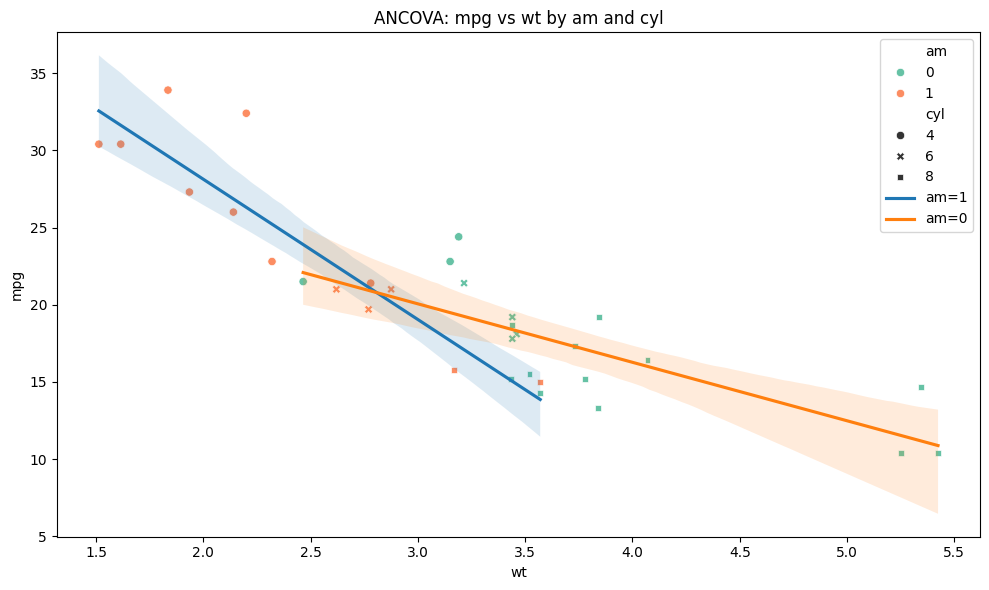


1. ÌöåÍ∑ÄÏÑ† Ìï¥ÏÑù (Í≥µÎ≥ÄÎüâ: wt)
- Ï∞®ÎüâÎ¨¥Í≤å(wt)Í∞Ä Ïò¨ÎùºÍ∞à ÏàòÎ°ù mpg(Ïó∞ÎπÑ)Í∞Ä Í∞êÏÜåÌïòÎäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- AM (0,1)Í≥º Î™®Îëê Í∞ôÏùÄ Î∞©Ìñ•Ïùò Í¥ÄÍ≥ÑÍ∞Ä Í¥ÄÏ∏°
- Í∏∞Ïö∏Í∏∞Í∞Ä ÎπÑÏä∑Ìï®ÏúºÎ°ú, Îëê Í∑∏Î£πÏóêÏÑú Ïú†ÏÇ¨Ìïú Î∞©Ìñ•
Ï¶â, wt Î¨¥Í≤åÏùò ÏòÅÌñ•ÏùÑ ÌÜµÏ†úÌïú ÌõÑ, am Î≥ÄÏàòÏùò Ï£ºÌö®Í≥ºÎ•º ÌôïÏù∏ÌïòÎ†§Îäî Í≤ÉÏù¥ ÌïµÏã¨

2. AM Ï£ºÌö®Í≥º
- Í∞ôÏùÄ Î¨¥Í≤å(wt)ÎùºÍ≥† ÌïòÎçîÎùºÎèÑ am =1Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏúÑÏóê ÏúÑÏπò

3. Í≥µÎ≥ÄÎüâ wt
- wtÎ•º ÌÜµÏ†úÌïú ÌõÑÏóêÎèÑ Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ > Ï≤òÏπò Ìö®Í≥º Ï°¥Ïû¨ Í∞ÄÎä•ÏÑ±Ïù¥ Ï°¥Ïû¨




In [272]:
# Ïòà) mpg ~ am + cyl + wt
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

# 9.1) Ï†ïÍ∑úÏÑ±/Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
res = []
for key, group in df.groupby(['am','cyl']) :
  stat, p_val = stats.shapiro(group['mpg'])
  res.append({'Group': key, 'Shapiro p': p, 'Ï†ïÍ∑úÏÑ±': 'Ï†ïÍ∑úÎ∂ÑÌè¨' if p > 0.05 else 'ÎπÑÏ†ïÍ∑úÎ∂ÑÌè¨'})
display(pd.DataFrame(res))

groups = [g['mpg'].values for _, g in df.groupby(['am', 'cyl'])]
stat, p = stats.levene(*groups)
print(f'Îì±Î∂ÑÏÇ∞ÏÑ± p = {p:.4f} ‚Üí {"Îì±Î∂ÑÏÇ∞" if p > 0.05 else "Îì±Î∂ÑÏÇ∞ ÏïÑÎãò"}')


# 2) ÏÉÅÌò∏ÏûëÏö© Í≤ÄÏ†ï (Í≥µÎ≥ÄÎüâ x ÏöîÏù∏)
model = ols('mpg ~ wt * am * cyl', data = df).fit()
t = anova_lm(model, typ = 2)
print(t)


# 3) ANOCOVA ÏàòÌñâ model = ols('mpg ~ wt + am + cyl', data=df).fit()
result = anova_lm(model, typ=2)
display(result)


# 4) ÏÇ¨ÌõÑÎ∂ÑÏÑù
res = []
for factor in ['am', 'cyl']:
    if df[factor].nunique() == 2:
        level = df[factor].unique()
        g1 = df[df[factor] == level[0]]['mpg']
        g2 = df[df[factor] == level[1]]['mpg']
        from scipy.stats import ttest_ind
        stat, p_val = ttest_ind(g1, g2, equal_var=True)
        res.append({'Factor': factor, 'T-test p': p_val})
    else:
        tukey = pairwise_tukeyhsd(df['mpg'], df[factor])
        print(f'\nTukey HSD for {factor}')
        print(tukey.summary())
display(pd.DataFrame(res))


# ÌöåÍ∑ÄÏÑ†
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wt', y='mpg', hue='am', style='cyl', palette='Set2')
for val in df['am'].unique():
    sns.regplot(data=df[df['am'] == val], x='wt', y='mpg', scatter=False, label=f'am={val}')
plt.title('ANCOVA: mpg vs wt by am and cyl')
plt.legend()
plt.tight_layout()
plt.show()

print('''
1. ÌöåÍ∑ÄÏÑ† Ìï¥ÏÑù (Í≥µÎ≥ÄÎüâ: wt)
- Ï∞®ÎüâÎ¨¥Í≤å(wt)Í∞Ä Ïò¨ÎùºÍ∞à ÏàòÎ°ù mpg(Ïó∞ÎπÑ)Í∞Ä Í∞êÏÜåÌïòÎäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- AM (0,1)Í≥º Î™®Îëê Í∞ôÏùÄ Î∞©Ìñ•Ïùò Í¥ÄÍ≥ÑÍ∞Ä Í¥ÄÏ∏°
- Í∏∞Ïö∏Í∏∞Í∞Ä ÎπÑÏä∑Ìï®ÏúºÎ°ú, Îëê Í∑∏Î£πÏóêÏÑú Ïú†ÏÇ¨Ìïú Î∞©Ìñ•
Ï¶â, wt Î¨¥Í≤åÏùò ÏòÅÌñ•ÏùÑ ÌÜµÏ†úÌïú ÌõÑ, am Î≥ÄÏàòÏùò Ï£ºÌö®Í≥ºÎ•º ÌôïÏù∏ÌïòÎ†§Îäî Í≤ÉÏù¥ ÌïµÏã¨

2. AM Ï£ºÌö®Í≥º
- Í∞ôÏùÄ Î¨¥Í≤å(wt)ÎùºÍ≥† ÌïòÎçîÎùºÎèÑ am =1Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏúÑÏóê ÏúÑÏπò

3. Í≥µÎ≥ÄÎüâ wt
- wtÎ•º ÌÜµÏ†úÌïú ÌõÑÏóêÎèÑ Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ > Ï≤òÏπò Ìö®Í≥º Ï°¥Ïû¨ Í∞ÄÎä•ÏÑ±Ïù¥ Ï°¥Ïû¨

''')

üîé Rank ANCOVA Í≤∞Í≥º


sum_sq    df         F    PR(>F)
C(am)       5.832579   1.0  0.460573  0.503132
C(cyl)    191.313513   2.0  7.553594  0.002481
wt_rank    92.262603   1.0  7.285572  0.011844
Residual  341.921011  27.0       NaN       NaN


üß™ Mann‚ÄìWhitney U test for am: p = 0.0019

üß™ Dunn's test for cyl


4         6         8
4  1.000000  0.106758  0.000001
6  0.106758  1.000000  0.080531
8  0.000001  0.080531  1.000000

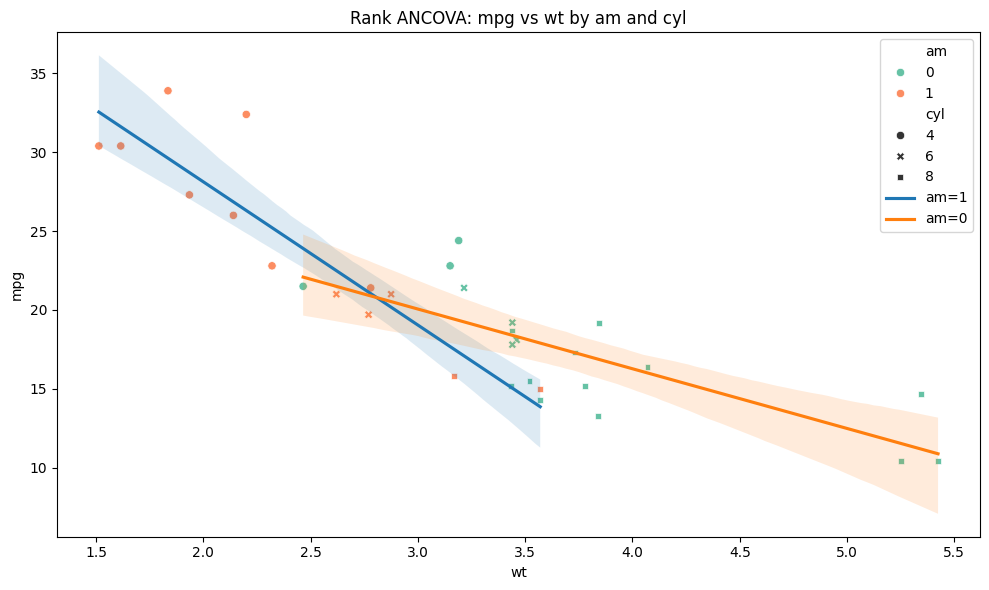

In [273]:
# 9.2) ÎπÑÎ™®Ïàò ANCOVA

# ÏàúÏúÑÌôî
df['mpg_rank'] = rankdata(df['mpg'])
df['wt_rank'] = rankdata(df['wt'])

# mpg_rank ~ wt_rank + am + cyl (Í≥µÎ≥ÄÎüâÍ≥º Ï¢ÖÏÜçÎ≥ÄÏàò Î™®Îëê ÏàúÏúÑÌôî)
model_rank = ols('mpg_rank ~ wt_rank + C(am) + C(cyl)', data=df).fit()
rank_result = anova_lm(model_rank, typ=2)

print("üîé Rank ANCOVA Í≤∞Í≥º")
display(rank_result)


from scipy.stats import mannwhitneyu
import scikit_posthocs as sp

# amÏóê ÎåÄÌïú Mann‚ÄìWhitney U test (Ïù¥Ìï≠)
g0 = df[df['am'] == 0]['mpg']
g1 = df[df['am'] == 1]['mpg']
stat, p_val = mannwhitneyu(g0, g1)
print(f'\nüß™ Mann‚ÄìWhitney U test for am: p = {p_val:.4f}')

# cylÏóê ÎåÄÌïú Dunn's test
dunn_result = sp.posthoc_dunn(df, val_col='mpg', group_col='cyl', p_adjust='bonferroni')
print("\nüß™ Dunn's test for cyl")
display(dunn_result)


# ÌöåÍ∑ÄÏÑ†ÏùÄ ÏõêÎûòÍ∞í Í∏∞Ï§Ä (RankÎäî Ìï¥ÏÑù Ïñ¥Î†§ÏõÄ)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wt', y='mpg', hue='am', style='cyl', palette='Set2')
for val in df['am'].unique():
    sns.regplot(data=df[df['am'] == val], x='wt', y='mpg', scatter=False, label=f'am={val}')
plt.title('Rank ANCOVA: mpg vs wt by am and cyl')
plt.legend()
plt.tight_layout()
plt.show()


#### 10. MANCOVA
- Ï¢ÖÏÜçÎ≥ÄÏàò : 2Í∞ú Ïù¥ÏÉÅ (ÌïÑÏàò)
- ÏöîÏù∏ : 1Í∞ú Ïù¥ÏÉÅ (Î≤îÏ£ºÌòï)
- ÏàòÏπòÌòï Í≥µÎ≥ÄÎüâ : 1Í∞ú Ïù¥ÏÉÅ (ÌïÑÏàò)  

Ï°∞Í±¥
1. Ï†ïÍ∑úÏÑ± : Ï¢ÖÏÜçÎ≥ÄÏàòÎì§Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§
2. Îì±Î∂ÑÏÇ∞ : Box'M testÎ°ú Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïù¥ ÎèôÏùºÌï¥ÏïºÌïúÎã§
3. ÏÑ†ÌòïÏÑ± : Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ñ, Ï¢ÖÏÜçÎ≥ÄÏàò - Í≥µÎ≥ÄÎüâ Í∞Ñ Í¥ÄÍ≥ÑÍ∞Ä ÏÑ†ÌòïÏ†Å
4. Í≥µÎ≥ÄÎüâÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÎèÖÎ¶ΩÏÑ± : Í≥µÎ≥ÄÎüâÏùÄ ÏßëÎã®Ïóê Îî∞Îùº Ïú†ÏùòÌïòÍ≤å Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäîÎã§
5. Í≥µÎ≥ÄÎüâÍ≥º Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÏÑ†ÌòïÏÑ±

In [274]:
# -----------------------------
from numpy.random import default_rng
rng = default_rng(42)
n_per_group = 60
groups = np.repeat(['A','B','C'], n_per_group)

# Í≥µÎ≥ÄÎüâ: IQ (ÏßëÎã®Í∞Ñ ÌèâÍ∑†ÏùÄ Ïú†ÏÇ¨ÌïòÍ≤å ÏÑ§Ï†ï -> Í≥µÎ≥ÄÎüâ-ÏöîÏù∏ ÎèÖÎ¶Ω Í∞ÄÏ†ï Ï∂©Ï°±)
IQ = np.concatenate([
    rng.normal(110, 10, n_per_group),
    rng.normal(111, 10, n_per_group),
    rng.normal(109, 10, n_per_group)
])

# ÏßÑÏßú ÌöåÍ∑ÄÏãù: (ÏßëÎã®Ìö®Í≥º + IQÌö®Í≥º + Ïû°Ïùå)
# ÏßëÎã® ÌèâÍ∑† Ï∞®Ïù¥Î•º ÏùºÎ∂Ä Î∂ÄÏó¨ (C > B > A)
base_math  = {'A':70, 'B':74, 'C':78}
base_sci   = {'A':68, 'B':72, 'C':77}

math = np.array([base_math[g] for g in groups])  + 0.25*IQ + rng.normal(0, 6, len(groups))
sci  = np.array([base_sci[g]  for g in groups])  + 0.22*IQ + rng.normal(0, 6, len(groups))

df = pd.DataFrame({'method':groups, 'IQ':IQ, 'math':math, 'science':sci})
df.head()

method          IQ        math    science
0      A  113.047171  106.097803  91.955242
1      A   99.600159   96.216335  92.212398
2      A  117.504512   96.910565  99.849938
3      A  119.405647  106.489144  87.918026
4      A   90.489648   95.194951  87.157668

In [275]:
# ÍµêÏú°Î∞©Î≤ï - Method
# Í≥µÎ≥ÄÎüâ - IQ
# Ï¢ÖÏÜçÎ≥ÄÏàò - math, science

# Î™®ÏàòÏ†Å
# 1) Îã§Î≥ÄÎüâ Ï†ïÍ∑úÏÑ±
# 1.1) Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê Í¥ÄÌï¥ÏÑú Ï¢ÖÏÜçÎ≥ÄÏàò yÎì§Ïùò Í∞íÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Í∞ÄÏßÑÎã§.
t1 = pg.multivariate_normality(df[['math','science']], alpha = 0.05)
print(t1)

# 1.2) Method Î≥Ñ Ï†ïÍ∑úÏÑ±
for m in df.method.unique() :
  t2 = pg.multivariate_normality(df.loc[df['method'] == m, ['math','science']], alpha =0.05)
  print([m,t2])


# 2) Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò ÎèôÏßàÏÑ± - ÌïôÏäµÌö®Í≥ºÎ≥ÑÎ°ú Ï¢ÖÏÜçÎ≥ÄÏàò yÎì§Ïùò Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÄ ÎèôÏùºÌïòÎã§.
box =  pg.box_m(dvs = ['math','science'], group= 'method', data=df)

# 3) ÏÑ†ÌòïÏÑ± - Í≥µÎ≥ÄÎüâÍ≥º Í∞Å Ï¢ÖÏÜçÎ≥ÄÏàò (ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏ≤òÎ¶¨)
corr_math = df[['IQ','math']].corr().iloc[0,1]
corr_sci  = df[['IQ','science']].corr().iloc[0,1]

# 4) ÌïôÏäµÎ∞©Î≤ïÍ≥º Í≥µÎ≥ÄÎüâ(IQ)Ïóê ÏßëÎã®Í∞Ñ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
iq_method = ols(f'IQ ~ C(method)', data = df).fit()
print(sm.stats.anova_lm(iq_method))

HZResults(hz=np.float64(0.36667128949472105), pval=np.float64(0.9342780777105235), normal=True)
['A', HZResults(hz=np.float64(0.302239471429378), pval=np.float64(0.9103756874320372), normal=True)]
['B', HZResults(hz=np.float64(0.5259907022572496), pval=np.float64(0.43184288501140866), normal=True)]
['C', HZResults(hz=np.float64(0.4082064043795014), pval=np.float64(0.6989520524497683), normal=True)]
              df        sum_sq    mean_sq         F    PR(>F)
C(method)    2.0    146.126740  73.063370  0.974099  0.379547
Residual   177.0  13276.081884  75.006112       NaN       NaN


In [276]:
# -----------------------------
# 3. MANCOVA Î≥∏ Î∂ÑÏÑù (Îã§Î≥ÄÎüâ)
# -----------------------------
# statsmodels MANOVAÏóê Í≥µÎ≥ÄÎüâ Ìè¨Ìï®: 'math + science ~ C(method) + IQ'
mancova = MANOVA.from_formula('math + science ~ C(method) + IQ', data=df)
print("\n### MANCOVA Í≤∞Í≥º(Îã§Î≥ÄÎüâ) ###")
print(mancova.mv_test())

# -----------------------------
# 4. ÏÇ¨ÌõÑ Ìï¥ÏÑù(Ïã§Î¨¥Ìòï): 'Í≥µÎ≥ÄÎüâ Î≥¥Ï†ï ÏûîÏ∞®'Î°ú ÏßëÎã® ÎπÑÍµê (DVÎ≥Ñ)
#    - Í∞Å DVÏóêÏÑú: DV ~ IQ ÌöåÍ∑Ä ‚Üí ÏûîÏ∞®(=IQ Î≥¥Ï†ï Í≤∞Í≥º) ‚Üí Tukey HSD
# -----------------------------
posthoc_results = {}
for dv in ['math','science']:
    model = ols(f'{dv} ~ IQ', data=df).fit()
    df[dv+'_resid'] = model.resid   # IQ Î≥¥Ï†ï ÏûîÏ∞®
    tuk = pairwise_tukeyhsd(endog=df[dv+'_resid'], groups=df['method'], alpha=0.05)
    posthoc_results[dv] = tuk.summary()

print("\n### ÏÇ¨ÌõÑÍ≤ÄÏ†ï (IQ Î≥¥Ï†ï ÏûîÏ∞®Î°ú Tukey) ###")
for dv, summ in posthoc_results.items():
    print(f"\n[{dv}]")
    print(summ)



### MANCOVA Í≤∞Í≥º(Îã§Î≥ÄÎüâ) ###
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3598 2.0000 175.0000 155.6860 0.0000
         Pillai's trace 0.6402 2.0000 175.0000 155.6860 0.0000
 Hotelling-Lawley trace 1.7793 2.0000 175.0000 155.6860 0.0000
    Roy's greatest root 1.7793 2.0000 175.0000 155.6860 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(method)        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.5992 4.0000 350.0000 25.5340 0.0000
          Pillai's trace 0.4008 4.0000 

In [277]:
# ÎπÑÎ™®ÏàòÏ†Å -RankÎ≥ÄÌôò ÌõÑ ÏÇ¨ÌõÑÎ∂ÑÏÑù
df_rank = df.copy()
for col in ['IQ','math','science']:
    # ÌèâÍ∑†Îû≠ÌÅ¨(ÎèôÏàúÏúÑ Î≥¥Ï†ï): method='average'
    df_rank[col] = df_rank[col].rank(method='average')

# 1) Rank-MANCOVA (Îã§Î≥ÄÎüâ)
mancova_rank = MANOVA.from_formula('math + science ~ C(method) + IQ', data=df_rank)
print("\n### Rank-MANCOVA Í≤∞Í≥º(Îã§Î≥ÄÎüâ) ###")
print(mancova_rank.mv_test())

# 2) Rank-ANCOVAÏãù ÏÇ¨ÌõÑÍ≤ÄÏ†ï: (DV_rank ~ IQ_rank) ÏûîÏ∞® ‚Üí Tukey
posthoc_rank = {}
for dv in ['math','science']:
    mod = ols(f'{dv} ~ IQ', data=df_rank).fit()
    df_rank[dv+'_rresid'] = mod.resid
    tuk = pairwise_tukeyhsd(endog=df_rank[dv+'_rresid'], groups=df_rank['method'], alpha=0.05)
    posthoc_rank[dv] = tuk.summary()

print("\n### Rank-ÏÇ¨ÌõÑÍ≤ÄÏ†ï (IQ Îû≠ÌÅ¨ Î≥¥Ï†ï ÏûîÏ∞®Î°ú Tukey) ###")
for dv, summ in posthoc_rank.items():
    print(f"\n[{dv}]")
    print(summ)


### Rank-MANCOVA Í≤∞Í≥º(Îã§Î≥ÄÎüâ) ###
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7966 2.0000 175.0000 22.3365 0.0000
         Pillai's trace 0.2034 2.0000 175.0000 22.3365 0.0000
 Hotelling-Lawley trace 0.2553 2.0000 175.0000 22.3365 0.0000
    Roy's greatest root 0.2553 2.0000 175.0000 22.3365 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
       C(method)        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.5831 4.0000 350.0000 27.0853 0.0000
         Pillai's trace 0.4169 4.0000 352.0000 2

#### 11. ÌòºÌï© ÏÑ§Í≥Ñ (Mixed ANOVA)

In [278]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/mixedanova.csv")
df.head()

id genotype  before  after
0   1        A    1.53   4.08
1   2        A    1.83   4.84
2   3        A    1.38   4.26
3   4        A    1.92   4.35
4   5        A    1.30   4.79

In [279]:
# Between - genotype
# Within - before, after
# Í∑∏Î£πÎ≥Ñ, ÏÇ¨Ï†Ñ, ÏÇ¨ÌõÑÍ∞Ä Í∞ôÏù¥ ÏûàÎäî ÌòïÌÉú


df_melt = pd.melt(
                  df.reset_index() ,
                  id_vars =['id','genotype'] ,
                  value_vars = ['before', 'after'] ,
                  var_name = 'Time' , value_name = 'yield'
)
df_melt.head(5)
# genotype : between suject ÏöîÏù∏
# TIme : within subest ÏöîÏù∏
# yeld : Ï¢ÖÏÜçÎ≥ÄÏàò


res = []
df_melt['combo']= df_melt['genotype'] + '_' + df_melt['Time']
print(df_melt.head(4))
for key, group in df_melt.groupby('combo') :
  stat, p_val = stats.shapiro(group['yield'])

  res.append({
      'Ï°∞Ìï©' : key,
      'pvalue' : p_val,
      'Decision' : 'Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§' if p_val > 0.05 else 'Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§',
  })
res = pd.DataFrame(res)

g = [group['yield'] for name, group in df_melt.groupby('combo')]
stat, leven_p = stats.levene(* g)

res['leven_pval'] = leven_p
res

   id genotype    Time  yield     combo
0   1        A  before   1.53  A_before
1   2        A  before   1.83  A_before
2   3        A  before   1.38  A_before
3   4        A  before   1.92  A_before


Ï°∞Ìï©    pvalue Decision  leven_pval
0   A_after  0.362694   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802
1  A_before  0.461201   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802
2   B_after  0.687226   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802
3  B_before  0.396233   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802
4   C_after  0.054206   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802
5  C_before  0.784187   Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§    0.286802


Group Í∞Ñ yield ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏóÜÏùå
Time : Before, AfterÍ∞Ñ ÌèâÍ∑† Ï∞®Ïù¥ ÏóÜÏùå
Interaction : ÏÉÅÌò∏ÏûëÏö© ÏóÜÏùå (Îëê ÏöîÏù∏Ïù¥ ÎèÖÎ¶ΩÏ†Å)



Source         SS  DF1  DF2         MS           F         p-unc  \
0     genotype  10.242987    2   12   5.121493   16.351889  3.741297e-04   
1         Time  31.868213    1   12  31.868213  373.404574  2.083410e-10   
2  Interaction   4.100347    2   12   2.050173   24.022184  6.371677e-05   

        np2  eps  
0  0.731566  NaN  
1  0.968864  1.0  
2  0.800148  NaN

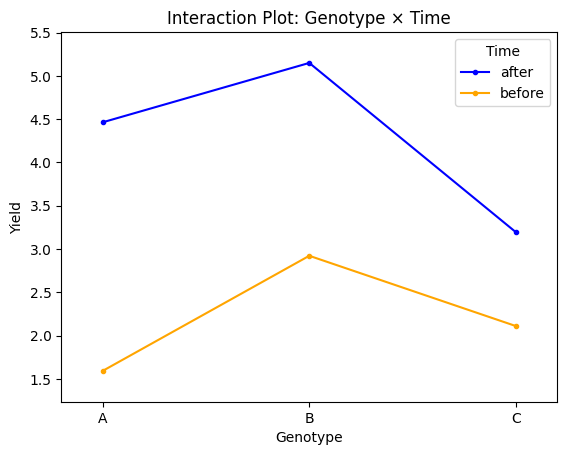


POST HOC TESTS

Contrast         Time    A      B       Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust         BF10    hedges
---------------  ------  -----  ------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ---------  --------
Time             -       after  before  True      True           9.331  14.000  two-sided        0.000   nan      nan         69270.000     2.427
genotype         -       A      B       False     True          -3.390   8.000  two-sided        0.009     0.028  sidak           5.399    -1.937
genotype         -       A      C       False     True           3.020   8.000  two-sided        0.017     0.049  sidak           3.726     1.725
genotype         -       B      C       False     True           4.775   8.000  two-sided        0.001     0.004  sidak          21.200     2.728
Time * genotype  after   A      B       False     True          -1.810   8.000  two-sided        0.108     

In [280]:

print('''
Group Í∞Ñ yield ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏóÜÏùå
Time : Before, AfterÍ∞Ñ ÌèâÍ∑† Ï∞®Ïù¥ ÏóÜÏùå
Interaction : ÏÉÅÌò∏ÏûëÏö© ÏóÜÏùå (Îëê ÏöîÏù∏Ïù¥ ÎèÖÎ¶ΩÏ†Å)
''')

aov = pg.mixed_anova(
    dv='yield', between='genotype',
    within='Time', subject='id',
    data=df_melt, correction=False, effsize='np2'
)
display(aov)

fig = interaction_plot(
    x=df_melt['genotype'], trace=df_melt['Time'],
    response=df_melt['yield'], colors=['blue','orange']
)
plt.title('Interaction Plot: Genotype √ó Time')
plt.xlabel('Genotype')
plt.ylabel('Yield')
plt.show()

# ÏÇ¨ÌõÑÎ∂ÑÏÑù
post = pg.pairwise_tests(
    data=df_melt, dv='yield',
    between='genotype', within='Time',
    subject='id', padjust='sidak'
)
pg.print_table(post)

#### ÏÉÅÍ¥ÄÍ≥ÑÏàò
1. Ìé∏ÏÉÅÍ¥ÄÍ≥ÑÏàò
- Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏàúÏàòÌïú ÏÉÅÍ¥ÄÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. Ï†ú 3Ïùò Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú ÌõÑÏùò ÏÉÅÍ¥Ä
- Îã§Î•∏ Î≥ÄÏàòÏùò Ìö®Í≥ºÎ•º ÌÜµÏ†úÌïú ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [284]:
# 1. Ìé∏ÏÉÅÍ¥ÄÍ≥ÑÏàò
# Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏàúÏàòÌïú ÏÉÅÍ¥ÄÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. Ï†ú 3Ïùò Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú ÌõÑÏùò ÏÉÅÍ¥Ä
# Îã§Î•∏ Î≥ÄÏàòÏùò Ìö®Í≥ºÎ•º ÌÜµÏ†úÌïú ÏÉÅÍ¥ÄÍ≥ÑÏàò

from palmerpenguins import load_penguins
import pingouin as pg

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = load_penguins().dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm'])

# Ìé∏ÏÉÅÍ¥Ä: bill_lengthÎ•º ÌÜµÏ†úÌïú ÏÉÅÌÉúÏóêÏÑú bill_depthÏôÄ flipper_lengthÏùò Í¥ÄÍ≥Ñ
pcorr = pg.partial_corr(data=df, x='bill_depth_mm', y='flipper_length_mm', covar='bill_length_mm')
print("Ìé∏ÏÉÅÍ¥Ä Í≤∞Í≥º:\n", pcorr)
print('''
Ìï¥ÏÑù : bill_length_mm (Î∂ÄÎ¶¨Í∏∏Ïù¥)Í∞Ä Í≥µÌÜµÏõêÏù∏ÏúºÎ°ú ÏûëÏö©Ìï¥ÏÑú,Y1-Y2Ïùò ÏÉÅÍ¥ÄÏùÑ Í∞ïÌôîÏãúÏº∞Îã§.
      Ïù¥Î•º Ï†úÍ±∞ÌïòÍ≥† ÏàúÏàòÌïú Í¥ÄÍ≥ÑÎ•º Î≥¥Î©¥ ÏßÑÏßú Í¥ÄÍ≥ÑÎäî Ïù¥Ï†ïÎèÑÎã§.
''')

Ìé∏ÏÉÅÍ¥Ä Í≤∞Í≥º:
            n         r           CI95%         p-val
pearson  342 -0.585735  [-0.65, -0.51]  8.593353e-33

Ìï¥ÏÑù : bill_length_mm (Î∂ÄÎ¶¨Í∏∏Ïù¥)Í∞Ä Í≥µÌÜµÏõêÏù∏ÏúºÎ°ú ÏûëÏö©Ìï¥ÏÑú,Y1-Y2Ïùò ÏÉÅÍ¥ÄÏùÑ Í∞ïÌôîÏãúÏº∞Îã§. 
      Ïù¥Î•º Ï†úÍ±∞ÌïòÍ≥† ÏàúÏàòÌïú Í¥ÄÍ≥ÑÎ•º Î≥¥Î©¥ ÏßÑÏßú Í¥ÄÍ≥ÑÎäî Ïù¥Ï†ïÎèÑÎã§. 



#### 2. Îì±ÏúÑÏÉÅÍ¥ÄÍ≥ÑÏàò [ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï]
- Î≤îÏ£ºÌòï (ÏàúÏúÑ, ÏÑúÏó¥)ÏùºÎïå, spearnmanr, kendailtau Îëê Í∞úÍ∞Ä Í∞ÄÎä•
- Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä Îî∞Î•¥ÏßÄ ÏïäÍ±∞ÎÇò, Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏùÑÎïå, ÏàúÏúÑÎ•º Îß§ÏºúÏÑú Í≤¨Í≥†Ìïú Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏

In [286]:
from scipy.stats import spearmanr, kendalltau


x = df['bill_length_mm']
y = df['flipper_length_mm']

# Pearson (ÏùºÎ∞ò ÏÉÅÍ¥Ä)
pearson_r = x.corr(y, method='pearson')

# Spearman (Îì±ÏúÑÏÉÅÍ¥Ä)
spearman_r, spearman_p = spearmanr(x, y)

# Kendall (Îì±ÏúÑÏÉÅÍ¥Ä)
kendall_r, kendall_p = kendalltau(x, y)

print("Pearson ÏÉÅÍ¥Ä:", round(pearson_r,3))
print("Spearman Îì±ÏúÑÏÉÅÍ¥Ä:", round(spearman_r,3), "p=", spearman_p)
print("Kendall Îì±ÏúÑÏÉÅÍ¥Ä:", round(kendall_r,3), "p=", kendall_p)

Pearson ÏÉÅÍ¥Ä: 0.656
Spearman Îì±ÏúÑÏÉÅÍ¥Ä: 0.673 p= 2.0669356276079494e-46
Kendall Îì±ÏúÑÏÉÅÍ¥Ä: 0.483 p= 1.7471887323081624e-39


#### 3. Ï†ïÏ§ÄÏÉÅÍ¥ÄÎ∂ÑÏÑù
- Îëê Î≥ÄÏàò "Íµ∞ Group"Ïóê ÎåÄÌï¥ÏÑú ÏÇ¥Ìé¥Î≥ºÎñÑ , ÏßëÌï© Í∞Ñ ÎåÄÏπ≠Ï†Å Í¥ÄÍ≥ÑÎ•º Î≥∏Îã§.
- Ex) Ïù∏ÏßÄÎä•Î†•Í≤ÄÏÇ¨ (XÏßëÌï©) VS ÌïôÏóÖ ÏÑ±Ï∑®ÎèÑ (YÏßëÌï©)

In [288]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
# X ÏßëÌï© (Î∂ÄÎ¶¨ Í¥ÄÎ†®)
X = df[['bill_length_mm','bill_depth_mm']]

# Y ÏßëÌï© (Ï≤¥Ìòï Í¥ÄÎ†®)
Y = df[['flipper_length_mm','body_mass_g']]

# ÌëúÏ§ÄÌôî (CCAÎäî Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Y_std = scaler.fit_transform(Y)

# Ï†ïÏ§ÄÏÉÅÍ¥ÄÎ∂ÑÏÑù
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_std, Y_std)

# Ï≤´ Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä
corr1 = pd.Series(X_c[:,0]).corr(pd.Series(Y_c[:,0]))
# Îëê Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä
corr2 = pd.Series(X_c[:,1]).corr(pd.Series(Y_c[:,1]))

print("Ï≤´ Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä:", round(corr1,3))
print("Îëê Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä:", round(corr2,3))

Ï≤´ Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä: 0.791
Îëê Î≤àÏß∏ Ï†ïÏ§ÄÏÉÅÍ¥Ä: 0.1


#### 4. Î∂ÄÎ∂Ñ ÏÉÅÍ¥Ä Í≥ÑÏàò
- Y1 ~ X1 + X2 Î™®Îç∏ÏóêÏÑú, X2Ïùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú, X1, YÏùò ÏÉÅÍ¥ÄÏùÑ Î¥ÑÏúºÎ°ú, X1Ïùò ÏàúÏàò Í∏∞Ïó¨ÎèÑ
- Ìé∏ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Ï†ú3Î≥ÄÏàòÎ•º Îëê Î≥ÄÏàò Î™®ÎëêÏóêÏÑú Ï†úÍ±∞ÌïòÏßÄÎßå, Î∂ÄÎ∂Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 3Î≥ÄÏàòÎ•º ÌïúÏ™ΩÏóêÏÑúÎßå Ï†úÍ±∞ÌïúÎã§.


#### 5. Îã§Î≥ÄÎüâ ÏÉÅÍ¥ÄÍ≥ÑÏàò
- Ïó¨Îü¨ ÎèÖÎ¶Ω Î≥ÄÏàòÎì§Ïùò ÏÑ†ÌòïÍ≤∞Ìï©

In [289]:
# Í∞ÄÏÉÅ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
np.random.seed(1)
n = 50
X1 = np.random.normal(0,1,n)
X2 = 0.5*X1 + np.random.normal(0,1,n)  # X1Í≥º ÏÉÅÍ¥Ä ÏûàÎäî Î≥ÄÏàò
Y  = 0.7*X1 + 0.2*X2 + np.random.normal(0,1,n)

df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})

# 1) ÌöåÍ∑ÄÎ∂ÑÏÑù (Y ~ X1 + X2)
X = sm.add_constant(df[['X1','X2']])
model = sm.OLS(df['Y'], X).fit()
print(model.summary())

# 2) Îã§Î≥ÄÎüâ ÏÉÅÍ¥ÄÍ≥ÑÏàò R
R = np.corrcoef(model.fittedvalues, df['Y'])[0,1]
print("Îã§Î≥ÄÎüâ ÏÉÅÍ¥ÄÍ≥ÑÏàò R =", round(R,3))
print("ÏÑ§Î™ÖÎ†• R^2 =", round(R**2,3))

# 3) Î∂ÄÎ∂ÑÏÉÅÍ¥Ä (Semi-partial)
# Semi-partial(X1,Y|X2) = corr(resid(X1~X2), Y)
resid_X1 = sm.OLS(df['X1'], sm.add_constant(df['X2'])).fit().resid
semi_r_X1 = np.corrcoef(resid_X1, df['Y'])[0,1]

# Semi-partial(X2,Y|X1)
resid_X2 = sm.OLS(df['X2'], sm.add_constant(df['X1'])).fit().resid
semi_r_X2 = np.corrcoef(resid_X2, df['Y'])[0,1]

print("Î∂ÄÎ∂ÑÏÉÅÍ¥Ä(X1,Y|X2) =", round(semi_r_X1,3))
print("Î∂ÄÎ∂ÑÏÉÅÍ¥Ä(X2,Y|X1) =", round(semi_r_X2,3))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     20.48
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.01e-07
Time:                        07:41:06   Log-Likelihood:                -63.995
No. Observations:                  50   AIC:                             134.0
Df Residuals:                      47   BIC:                             139.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0926      0.129      0.717      0.4

#### 12. ÎåÄÏùëÏùºÏπòÎ∂ÑÏÑù
- Î≤îÏ£ºÌòï ÍµêÏ∞®ÌëúÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Îã§Î≥ÄÎüâ Î∂ÑÏÑù Í∏∞Î≤ï
- Î≤îÏ£º Í∞Ñ Ïú†ÏÉÅÏÑ±/Í¥ÄÍ≥ÑÎ•º Ï†ÄÏ∞®Ïõê Í≥µÏõêÏóê ÏãúÍ∞ÅÌôî Ìï¥Ï§å

In [290]:
# Îç∞Ïù¥ÌÑ∞: Ìé≠Í∑Ñ Ï¢ÖÎ≥Ñ √ó ÏÑ¨Î≥Ñ ÎπàÎèÑ ÍµêÏ∞®Ìëú
df = load_penguins().dropna(subset=['species','island'])
ct = pd.crosstab(df['species'], df['island'])
print("ÍµêÏ∞®Ìëú:\n", ct)

ÍµêÏ∞®Ìëú:
 island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0


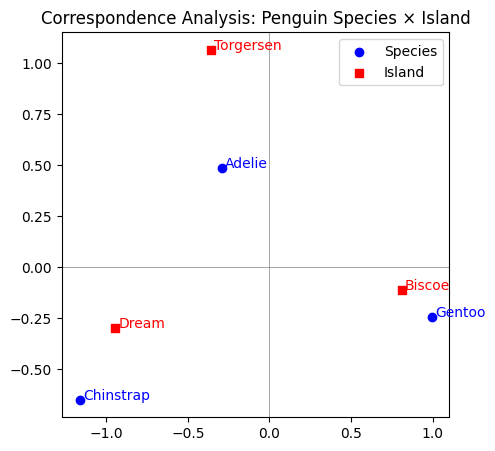

In [297]:
#!pip install palmerpenguins prince
import prince  # Correspondence Analysis library

ca = prince.CA(n_components=2, random_state=42)
ca = ca.fit(ct)

# Ìñâ/Ïó¥Ï¢åÌëú
row = ca.row_coordinates(ct)
col = ca.column_coordinates(ct)

fig, ax = plt.subplots(figsize = (5,5))
ax.axhline(0, color = 'grey', linewidth = 0.5)
ax.axvline(0, color='grey', linewidth=0.5)

# Ìñâ(Ï¢Ö)
ax.scatter(row[0], row[1], color='blue', label='Species')
for i, txt in enumerate(ct.index):
    ax.text(row.iloc[i,0]+0.02, row.iloc[i,1], txt, color='blue')

# Ïó¥(ÏÑ¨)
ax.scatter(col[0], col[1], color='red', marker='s', label='Island')
for i, txt in enumerate(ct.columns):
    ax.text(col.iloc[i,0]+0.02, col.iloc[i,1], txt, color='red')

ax.set_title("Correspondence Analysis: Penguin Species √ó Island")
ax.legend()
plt.show()


#### 13. MDS Îã§Ï∞®Ïõê Î∂ÑÏÑù
- Í∞ùÏ≤¥Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑ- Í±∞Î¶¨ ÌñâÎ†¨ÏùÑ Í∞ÄÏßÄÍ≥† Ïú†ÏÇ¨ÏÑ±/Ï∞®Ïù¥Î•º ÏãúÍ∞ÅÌôî

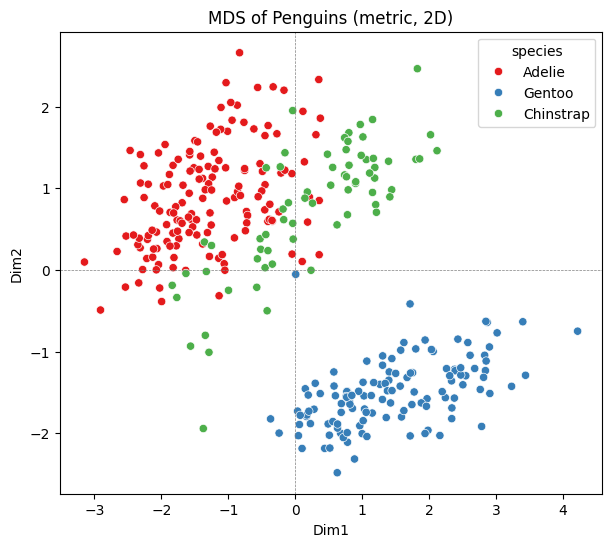

In [304]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['species']

for col in X.columns :
  if X[col].isna().sum() > 0 :
    X[col].fillna(X[col].mean(), inplace = True)


X.isna().sum()

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Í±∞Î¶¨ÌñâÎ†¨ (Ïú†ÌÅ¥Î¶¨Îìú)
dist_matrix = pairwise_distances(X_std, metric='euclidean')

# MDS (2Ï∞®Ïõê)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(dist_matrix)

df_plot = pd.DataFrame(X_mds, columns=['Dim1','Dim2'])
df_plot['species'] = y.values

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_plot, x='Dim1', y='Dim2', hue='species', palette='Set1')
plt.title("MDS of Penguins (metric, 2D)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()

##### 14. Ïª®Ï°∞Ïù∏Ìä∏ Î∂ÑÏÑù
- Ïó¨Îü¨ ÏÜçÏÑ±Í≥º ÏàòÏ§Ä(Level)Ïù¥ ÏùòÏÇ¨Í≤∞Ï†ïÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ï∂îÏ†ïÌïúÎã§.
- Ï†úÌíàÏùÑ Ïó¨Îü¨Í∞ÄÏßÄ ÏÜçÏÑ± Ï°∞Ìï©ÏúºÎ°ú Ï†úÏãúÌï¥ÏÑú, ÏÑ†Ìò∏ÎèÑ/ÏÑ†ÌÉù Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌï¥ÏÑú, ÏÜçÏÑ±Í≥º ÏàòÏ§ÄÏùÑ ÏÑ†Ìò∏ÌïòÎäîÏßÄ Í≥ÑÎüâÌôî


In [311]:
import itertools
# -----------------------------
# 1. ÏÜçÏÑ±/ÏàòÏ§Ä Ï†ïÏùò
# -----------------------------
attributes = {
    'Brand': ['A','B'],
    'Price': ['Low','High'],
    'Battery': ['Short','Long']
}

# Î™®Îì† Ï°∞Ìï©(2√ó2√ó2 = 8Í∞ú ÌîÑÎ°úÌååÏùº)
profiles = pd.DataFrame(list(itertools.product(*attributes.values())), columns=attributes.keys())

# -----------------------------
# 2. Í∞ÄÏÉÅ ÏùëÎãµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÏÑ†Ìò∏ÎèÑ rating)
#    (Ïã§Ï†úÎäî ÏÑ§Î¨∏ÏúºÎ°ú ÏàòÏßë)
# -----------------------------
import numpy as np
np.random.seed(42)

# Ìö®Ïö© Í∞ÄÏ†ï: Brand=A ÏÑ†Ìò∏(+2), Price=Low ÏÑ†Ìò∏(+3), Battery=Long ÏÑ†Ìò∏(+4)
utility = (
    (profiles['Brand']=='A').astype(int)*2 +
    (profiles['Price']=='Low').astype(int)*3 +
    (profiles['Battery']=='Long').astype(int)*4
)

# Ïû°Ïùå Ï∂îÍ∞Ä
profiles['Rating'] = utility + np.random.normal(0,1,len(profiles))

print("Profiles with Ratings:")
print(profiles)

Profiles with Ratings:
  Brand Price Battery    Rating
0     A   Low   Short  5.496714
1     A   Low    Long  8.861736
2     A  High   Short  2.647689
3     A  High    Long  7.523030
4     B   Low   Short  2.765847
5     B   Low    Long  6.765863
6     B  High   Short  1.579213
7     B  High    Long  4.767435


In [314]:
# -----------------------------
# 3. ÌöåÍ∑ÄÎ∂ÑÏÑùÏúºÎ°ú part-worth Ï∂îÏ†ï
# -----------------------------
# Î≤îÏ£ºÌòï ÎçîÎØ∏Î≥ÄÏàòÌôî
X = pd.get_dummies(profiles[['Brand','Price','Battery']], drop_first=True)
y = profiles['Rating']

# Convert boolean columns to integers
X = X.astype(int)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

# -----------------------------
# 4. Ìö®Ïö© & ÏÜçÏÑ± Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
# -----------------------------
part_worths_raw = model.params.drop('const')
print("\nPart-worth utilities:")

part_worths = {}
for attr, levels in attributes.items():
    # Get the part-worths for the levels of the current attribute
    attr_part_worths = {}
    for level in levels:
        dummy_col = f'{attr}_{level}'
        if dummy_col in part_worths_raw.index:
            attr_part_worths[level] = part_worths_raw[dummy_col]
        # If the level was dropped, its part-worth is the negative sum of other levels (or 0 if only one level)
        else:
             # Assuming the dropped level is the first one in the original list
            attr_part_worths[level] = 0

    # Center the part-worths for each attribute
    mean_part_worth = sum(attr_part_worths.values()) / len(attr_part_worths)
    part_worths[attr] = {level: pw - mean_part_worth for level, pw in attr_part_worths.items()}
    print(f"\n{attr}: {part_worths[attr]}")


# ÏÜçÏÑ± Ï§ëÏöîÎèÑ = (Í∞Å ÏÜçÏÑ± ÎÇ¥ max-min)/Ìï©
importance = {}
for attr, pworths in part_worths.items():
    max_min = max(pworths.values()) - min(pworths.values())
    importance[attr] = max_min

total_importance = sum(importance.values())
importance = {k: v/total_importance for k,v in importance.items()}

print("\nAttribute Importance:")
print(importance)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     61.26
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           0.000845
Time:                        08:04:38   Log-Likelihood:                -3.0300
No. Observations:                   8   AIC:                             14.06
Df Residuals:                       4   BIC:                             14.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.1393      0.353     20.202

In [316]:
# -----------------------------
# 4. Ìö®Ïö© & ÏÜçÏÑ± Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
# -----------------------------
importance = {}
for attr in attributes.keys():
    levels = [col for col in X.columns if col.startswith(attr+'_')]
    if len(levels) > 0:
        max_min = part_worths[levels].max() - part_worths[levels].min()
        importance[attr] = float(max_min)

total = sum(importance.values())

if total > 0:
    importance = {k: v/total for k,v in importance.items()}
else:
    importance = {k: 0 for k in importance.keys()}  # Ï§ëÏöîÎèÑ=0 Ï≤òÎ¶¨

print("\nAttribute Importance:")
print(importance)


Attribute Importance:
{'Brand': 0, 'Price': 0, 'Battery': 0}
